# <center>Exploratory Data Analysis of BTC Price Data</center>

## Imports

### Import Libraries 

In [1]:
# Import Libraries 
import pandas as pd
import pandas_datareader
import pandas_datareader.data as web
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime
import glob
import os
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
# Set the theme to 'seaborn' for a visually appealing style
sns.set()
plt.style.use('seaborn')
# Format numbers to display normally
pd.options.display.float_format = '{:,.4f}'.format

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/127845839.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Data Import

In [2]:
BTC = pd.read_csv('btcusd.csv')

In [3]:
BTC.head(3)

,time,open,close,high,low,volume
0,1364774820000,93.2500,93.3000,93.3000,93.2500,93.3000
1,1364774880000,100.0000,100.0000,100.0000,100.0000,93.3000
2,1364774940000,93.3000,93.3000,93.3000,93.3000,33.6769


In [4]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520199 entries, 0 to 4520198
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   open    float64
 2   close   float64
 3   high    float64
 4   low     float64
 5   volume  float64
dtypes: float64(5), int64(1)
memory usage: 206.9 MB


In [5]:
# Convert milliseconds to seconds by dividing by 1000 and apply to the 'time' column
BTC['time'] = BTC['time'] / 1000

# Convert to a human-readable date and time format
BTC['time'] = BTC['time'].apply(lambda x: datetime.utcfromtimestamp(x))

# Display the info again
display(BTC.info())

# Set the 'time' column as the index of the DataFrame
BTC.set_index('time', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520199 entries, 0 to 4520198
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   time    datetime64[ns]
 1   open    float64       
 2   close   float64       
 3   high    float64       
 4   low     float64       
 5   volume  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 206.9 MB


None

In [6]:
display(BTC.head(3))
display(BTC.tail(3))

,open,close,high,low,volume
time,,,,,
2013-04-01 00:07:00,93.2500,93.3000,93.3000,93.2500,93.3000
2013-04-01 00:08:00,100.0000,100.0000,100.0000,100.0000,93.3000
2013-04-01 00:09:00,93.3000,93.3000,93.3000,93.3000,33.6769


,open,close,high,low,volume
time,,,,,
2023-10-01 13:32:00,"27,183.0000","27,183.0000","27,183.0000","27,183.0000",0.0050
2023-10-01 13:34:00,"27,183.0000","27,183.0000","27,183.0000","27,183.0000",0.0006
2023-10-01 13:35:00,"27,182.0000","27,182.0000","27,182.0000","27,182.0000",0.3035


In [7]:
BTC.describe()

,open,close,high,low,volume
count,"4,520,199.0000","4,520,199.0000","4,520,199.0000","4,520,199.0000","4,520,199.0000"
mean,"14,179.2423","14,179.2531","14,185.6443","14,172.8508",13.7465
std,"16,074.9079","16,074.9431","16,082.5102","16,067.3324",51.5445
min,0.0100,1.0600,1.0600,0.0100,0.0000
25%,"1,000.8000","1,000.8000","1,001.5000","1,000.0000",0.2994
50%,"8,103.2000","8,103.1570","8,106.3000","8,100.0000",1.9017
75%,"21,548.0000","21,548.0000","21,556.0000","21,540.3632",9.2800
max,"68,925.0000","68,925.0000","68,958.0000","68,734.0000","7,228.0789"


## Data Visualization & Retuens

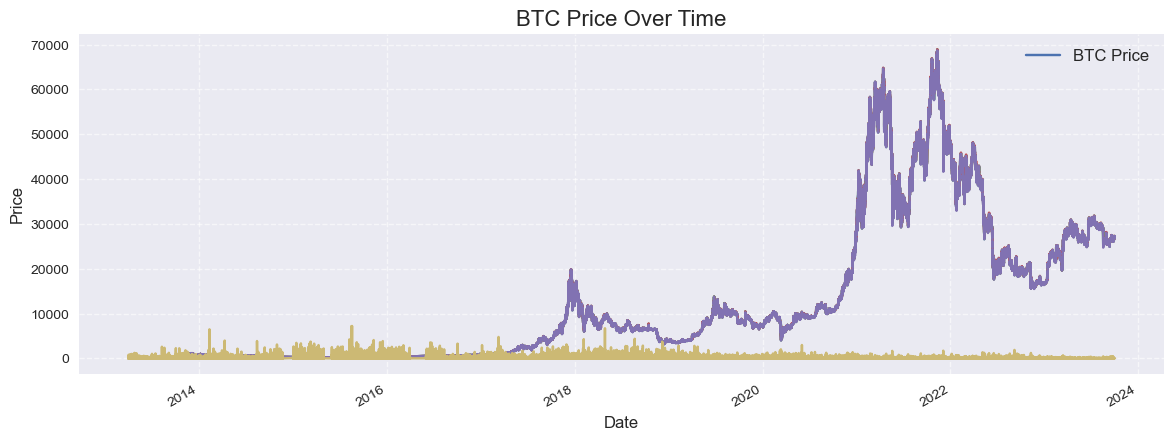

In [8]:
# Create the plot with custom labels
BTC.plot(figsize=(14, 5))
plt.title('BTC Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['BTC Price'], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [9]:
display(BTC['volume'].idxmax())
display(BTC.loc[BTC['volume'].idxmax()])
pd.DataFrame(BTC.nlargest(10, 'volume')).sort_index()

Timestamp('2015-08-18 20:10:00')

open       251.3000
close      249.0000
high       251.5100
low        246.6900
volume   7,228.0789
Name: 2015-08-18 20:10:00, dtype: float64

,open,close,high,low,volume
time,,,,,
2014-02-10 10:59:00,580.5000,451.0000,585.9400,451.0000,"6,480.6552"
2015-08-08 12:01:00,276.0800,274.5800,276.1000,272.6000,"4,235.0023"
2015-08-16 07:30:00,261.5000,258.8800,261.6600,258.0300,"7,193.9737"
2015-08-18 20:10:00,251.3000,249.0000,251.5100,246.6900,"7,228.0789"
2015-08-19 00:02:00,219.9700,227.7500,254.8300,215.0000,"4,885.6061"
2017-03-10 13:28:00,"1,325.1000","1,093.1000","1,327.4000","1,075.8000","4,777.8923"
2017-03-10 21:02:00,"1,256.8000","1,097.0000","1,257.0000","1,095.5000","4,457.5205"
2018-02-04 20:02:00,"8,177.0000","8,078.9000","8,190.9000","8,050.0000","4,286.7371"
2018-04-28 08:59:00,"9,205.1000","9,236.5000","9,500.0000","8,750.0000","6,717.5167"


In [10]:
# # Create a Plotly figure
# fig = go.Figure()

# # Add a line trace for BTC close price
# fig.add_trace(go.Scatter(x=BTC.index, y=BTC['close'], mode='lines', name='BTC Close Price'))

# # Customize the figure layout
# fig.update_layout(
#     title='BTC Price Over Time',
#     xaxis_title='Date',
#     yaxis_title='Price',
#     showlegend=True,
#     xaxis=dict(
#         rangeselector=dict(
#             buttons=list([
#                 dict(count=1, label='1m', step='month', stepmode='backward'),
#                 dict(count=6, label='6m', step='month', stepmode='backward'),
#                 dict(count=1, label='YTD', step='year', stepmode='todate'),
#                 dict(count=1, label='1y', step='year', stepmode='backward'),
#                 dict(step='all')
#             ])
#         ),
#         rangeslider=dict(visible=True),
#         type='date'
#     )
# )

# # Show the plot
# fig.show()

### Basic Financial Analysis

#### Daily Percentage Change [`Return`]

$ r_t = \frac{p_t}{p_{t-1}} -1$

There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, `BTC['returns'] = (BTC['Close'] / BTC['Close'].shift(1) ) - 1`

or you can also use `pandas` built in pct_change method.

In [11]:
# Resample to 15-minute intervals and apply the aggregations
BTC_15min = BTC.resample('15T').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
# Calculate the percentage change for the 'close' column
BTC_15min['Return'] = BTC_15min['close'].pct_change()
# Drop the NaN value in the 'Return' column (first row)
BTC_15min = BTC_15min.dropna()
BTC_15min['Total Traded'] = BTC_15min['close'] * BTC_15min['volume']

# Resample to 30-minute intervals and apply the aggregations
BTC_30min = BTC.resample('30T').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
# Calculate the percentage change for the 'close' column
BTC_30min['Return'] = BTC_30min['close'].pct_change()
# Drop the NaN value in the 'Return' column (first row)
BTC_30min = BTC_30min.dropna()
BTC_30min['Total Traded'] = BTC_30min['close'] * BTC_30min['volume']

# Resample the data to 1-hour intervals and apply the aggregations
BTC_1hr = BTC.resample('1H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
# Calculate the percentage change for the 'close' column
BTC_1hr['Return'] = BTC_1hr['close'].pct_change()
# Drop the NaN value in the 'Return' column (first row)
BTC_1hr = BTC_1hr.dropna()
BTC_1hr['Total Traded'] = BTC_1hr['close'] * BTC_1hr['volume']

# Resample the data to 4-hour intervals and apply the aggregations
BTC_4hr = BTC.resample('4H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
# Calculate the percentage change for the 'close' column
BTC_4hr['Return'] = BTC_4hr['close'].pct_change()
# Drop the NaN value in the 'Return' column (first row)
BTC_4hr = BTC_4hr.dropna()
BTC_4hr['Total Traded'] = BTC_4hr['close'] * BTC_4hr['volume']

# Resample to daily intervals and apply the aggregations
BTC_daily = BTC.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
# Calculate the percentage change for the 'close' column
BTC_daily['Return'] = BTC_daily['close'].pct_change()
# Drop the NaN value in the 'Return' column (first row)
BTC_daily = BTC_daily.dropna()
BTC_daily['Total Traded'] = BTC_daily['close'] * BTC_daily['volume']

BTC_weekly = BTC.resample('W').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
# Calculate the percentage change for the 'close' column
BTC_weekly['Return'] = BTC_weekly['close'].pct_change()
# Drop the NaN value in the 'Return' column (first row)
BTC_weekly = BTC_weekly.dropna()
BTC_weekly['Total Traded'] = BTC_weekly['close'] * BTC_weekly['volume']

# Resample to monthly intervals and apply the aggregations
BTC_monthly = BTC.resample('M').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
# Calculate the percentage change for the 'close' column
BTC_monthly['Return'] = BTC_monthly['close'].pct_change()
# Drop the NaN value in the 'Return' column (first row)
BTC_monthly = BTC_monthly.dropna()
BTC_monthly['Total Traded'] = BTC_monthly['close'] * BTC_monthly['volume']

# Resample to quarterly intervals and apply the aggregations
BTC_quarterly = BTC.resample('Q').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
# Calculate the percentage change for the 'close' column
BTC_quarterly['Return'] = BTC_quarterly['close'].pct_change()
# Drop the NaN value in the 'Return' column (first row)
BTC_quarterly = BTC_quarterly.dropna()
BTC_quarterly['Total Traded'] = BTC_quarterly['close'] * BTC_quarterly['volume']

In [12]:
display(BTC_1hr.head(2))
display(BTC_4hr.head(2))
display(BTC_daily.head(2))
display(BTC_monthly.head(2))

,open,high,low,close,volume,Return,Total Traded
time,,,,,,,
2013-04-01 01:00:00,93.3800,93.4880,93.1000,93.1000,45.2433,0.0000,"4,212.1545"
2013-04-01 02:00:00,93.1700,94.0000,93.1100,93.7400,466.3114,0.0069,"43,712.0325"


,open,high,low,close,volume,Return,Total Traded
time,,,,,,,
2013-04-01 04:00:00,93.1550,94.4800,93.1550,94.0000,111.0900,0.0140,"10,442.4611"
2013-04-01 08:00:00,93.5500,96.0000,93.5500,96.0000,484.4295,0.0213,"46,505.2285"


,open,high,low,close,volume,Return,Total Traded
time,,,,,,,
2013-04-02,104.0000,118.3867,99.0000,118.2294,"8,376.5275",0.1368,"990,351.4331"
2013-04-03,117.9583,146.8800,101.5109,134.7000,"12,996.2451",0.1393,"1,750,594.2112"


,open,high,low,close,volume,Return,Total Traded
time,,,,,,,
2013-05-31,139.8700,140.6800,80.0000,127.9000,"243,951.3412",-0.0856,"31,201,376.5452"
2013-06-30,127.7300,132.8700,86.1500,89.5500,"127,105.4878",-0.2998,"11,382,296.4367"


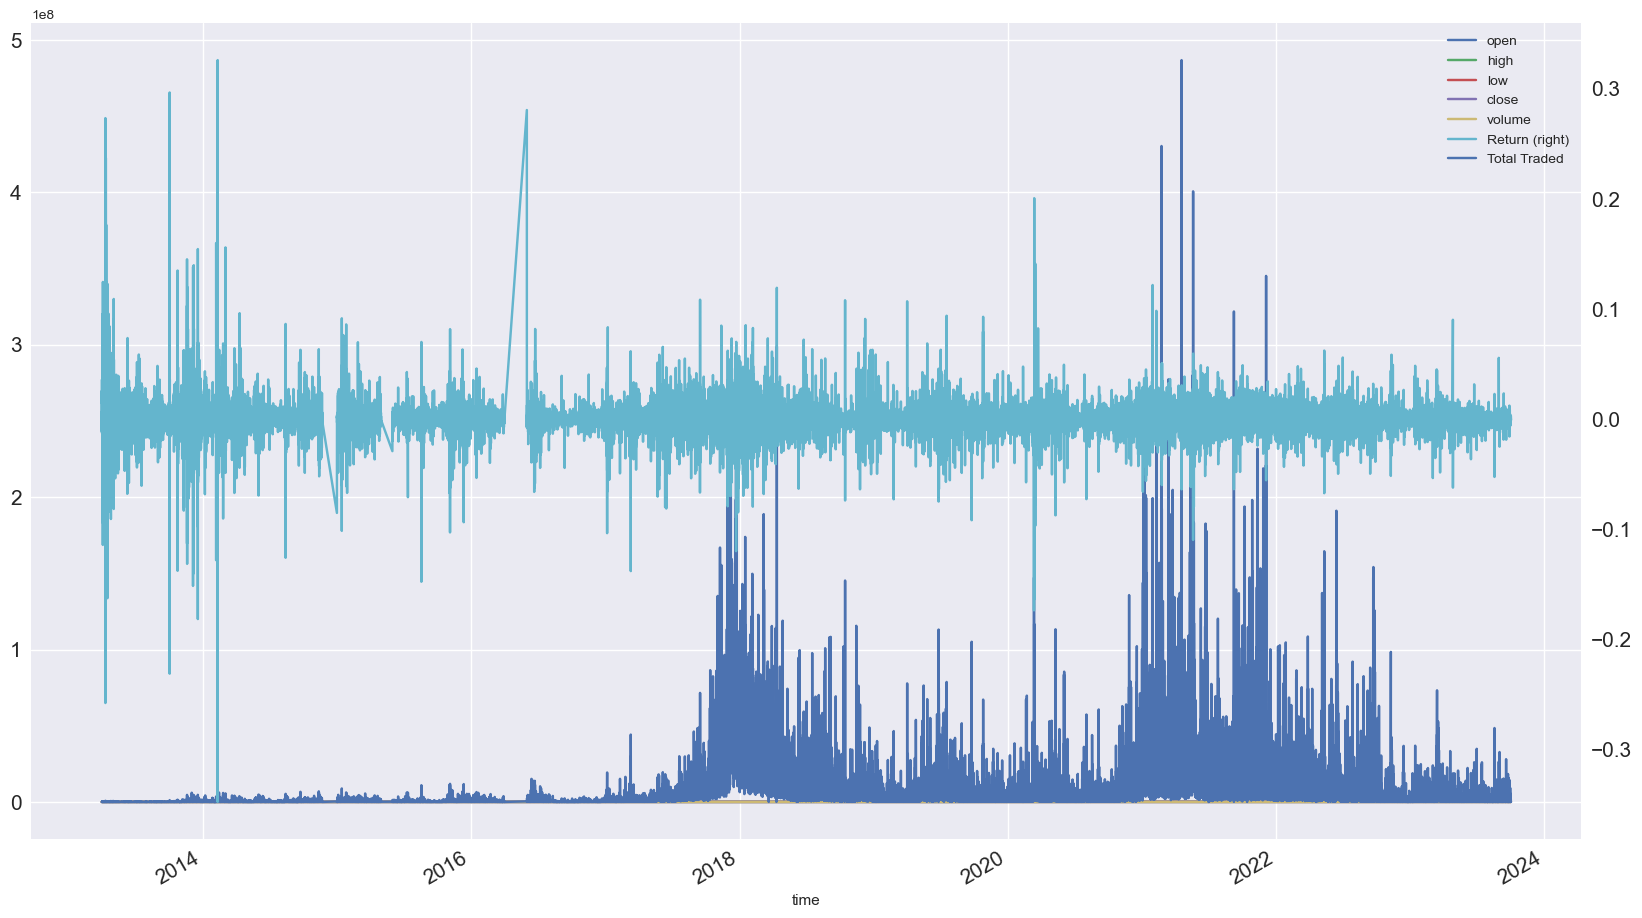

In [13]:
BTC_1hr.plot(figsize = (20, 12), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

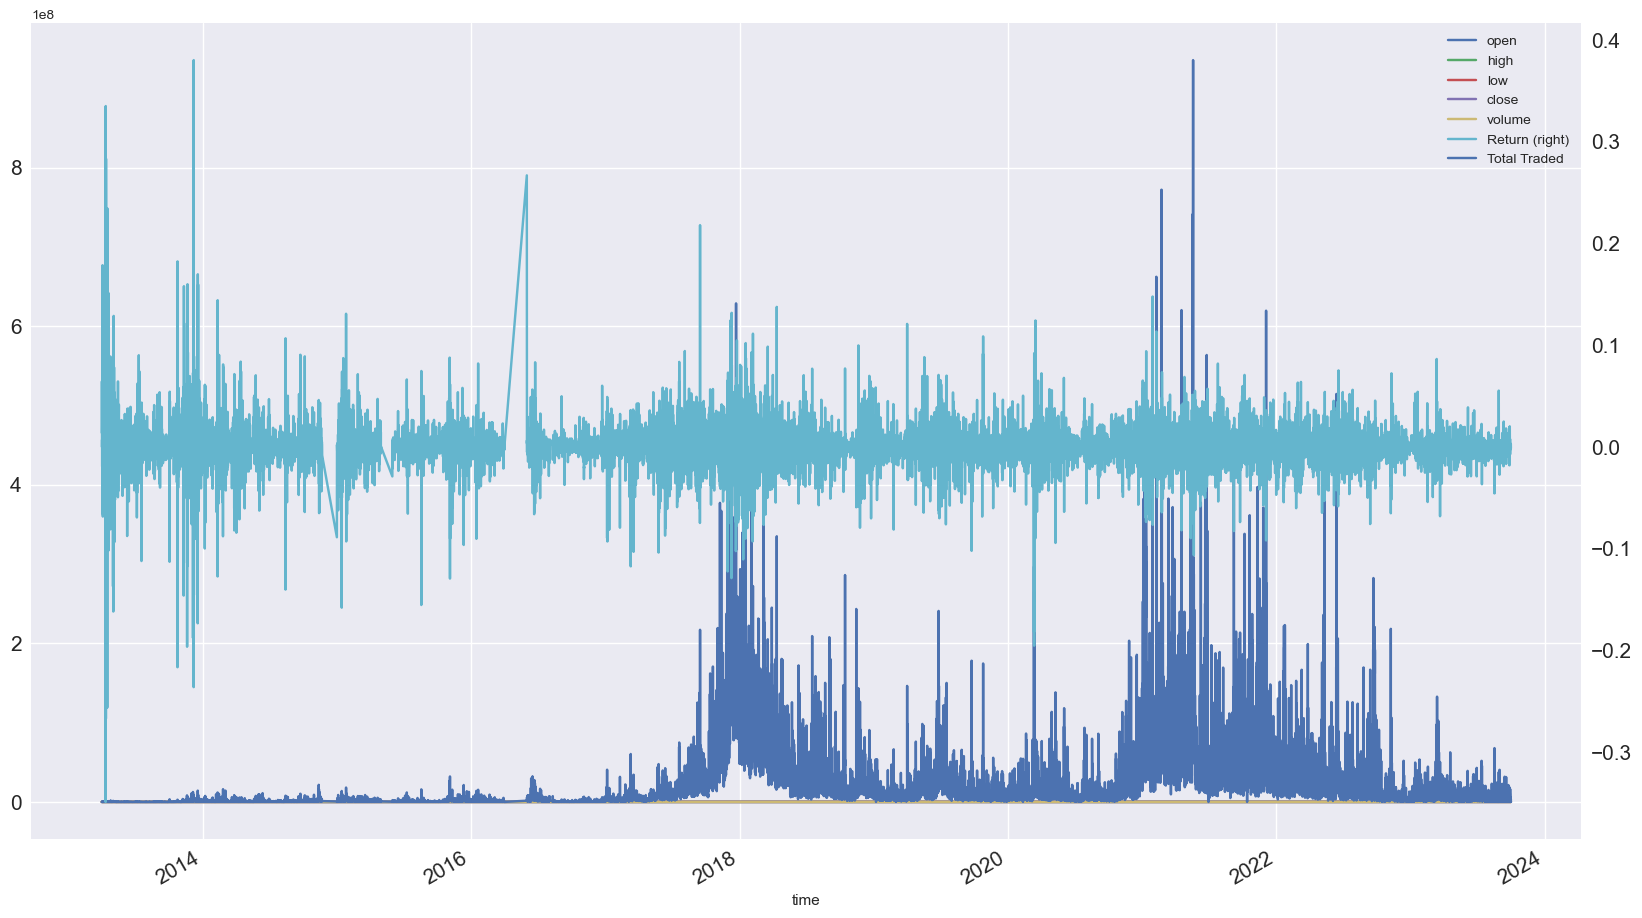

In [14]:
BTC_4hr.plot(figsize = (20, 12), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

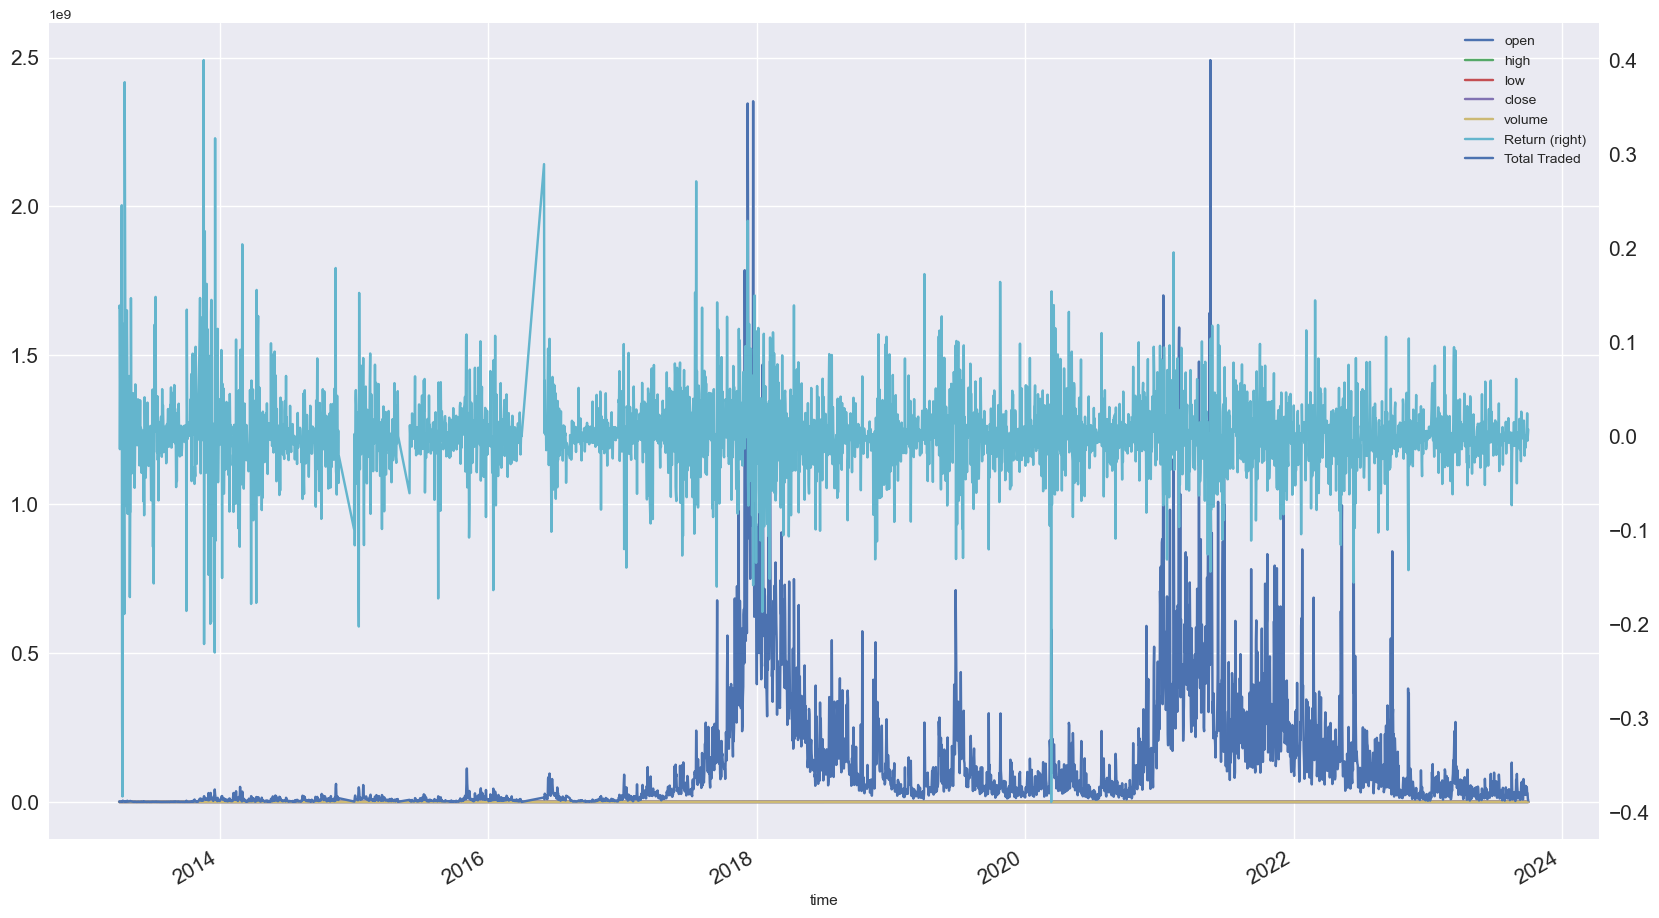

In [15]:
BTC_daily.plot(figsize = (20, 12), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

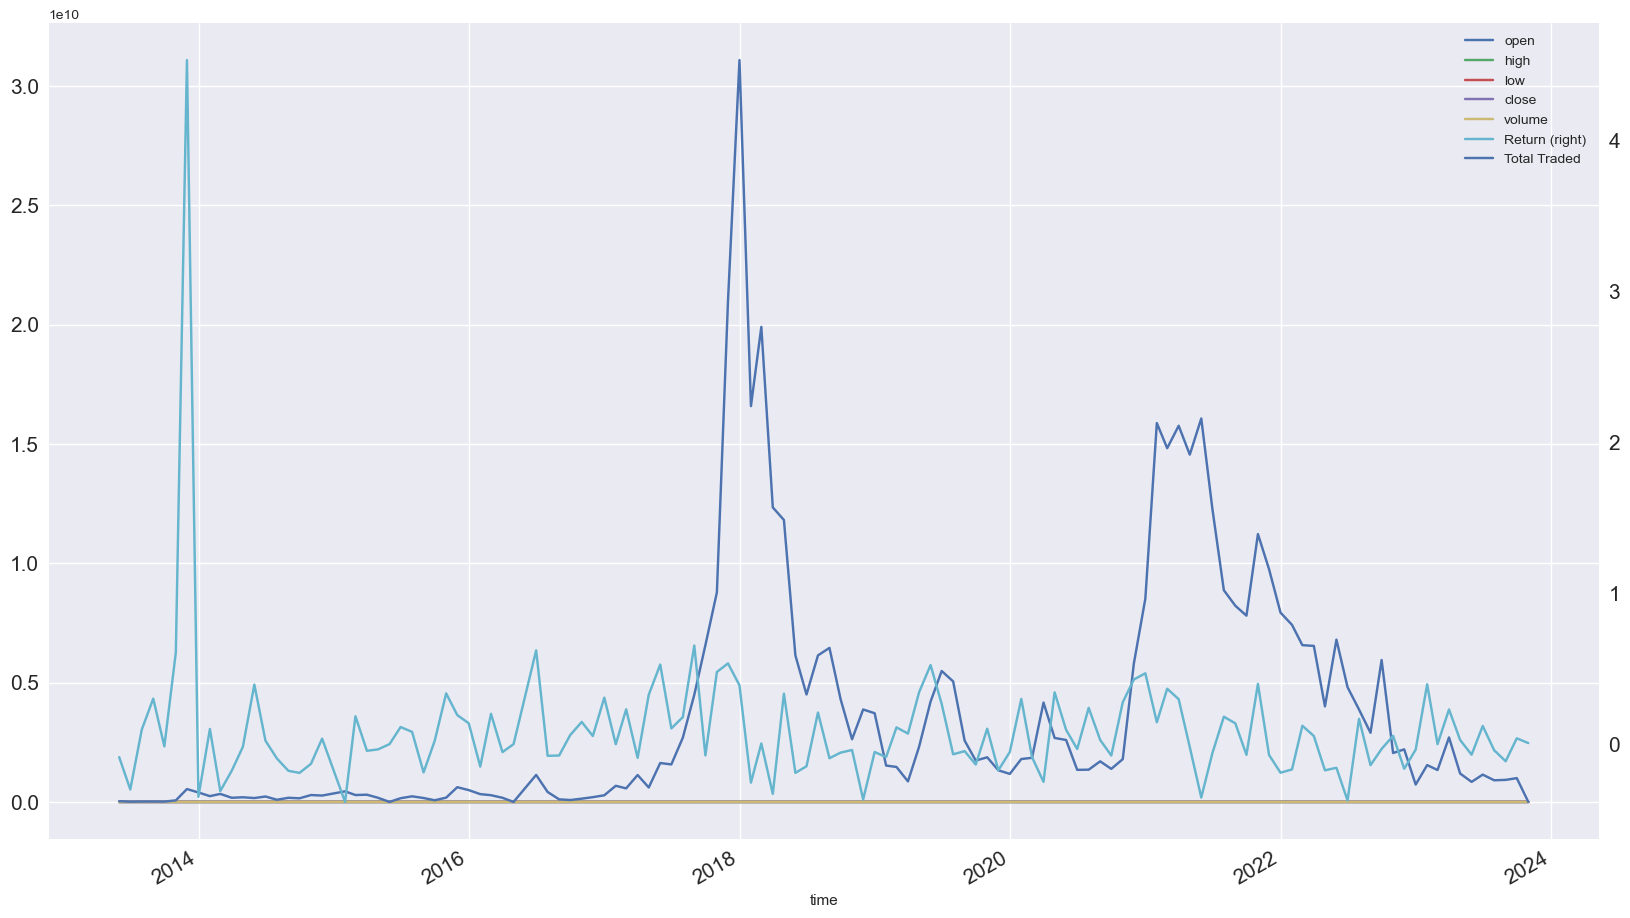

In [16]:
BTC_monthly.plot(figsize = (20, 12), secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

Text(0, 0.5, 'Total Traded')

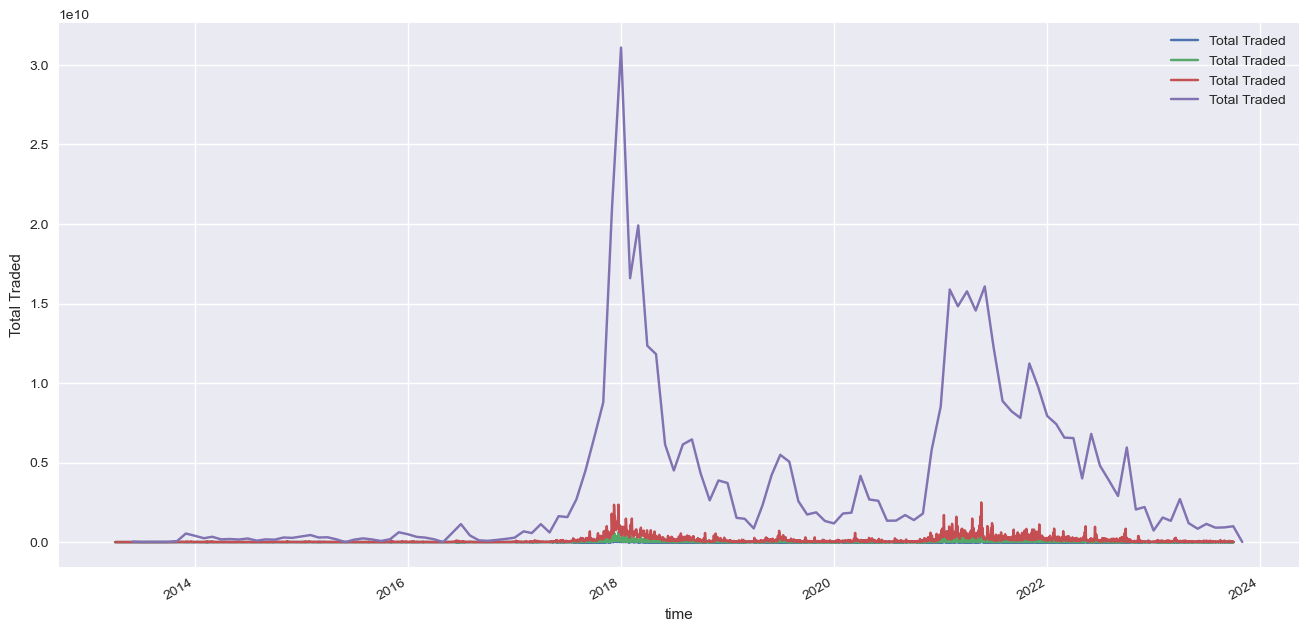

In [17]:
BTC_1hr['Total Traded'].plot(figsize=(16,8))
BTC_4hr['Total Traded'].plot(figsize=(16,8))
BTC_daily['Total Traded'].plot(figsize=(16,8))
BTC_monthly['Total Traded'].plot(figsize=(16,8))
plt.legend()
plt.ylabel('Total Traded')

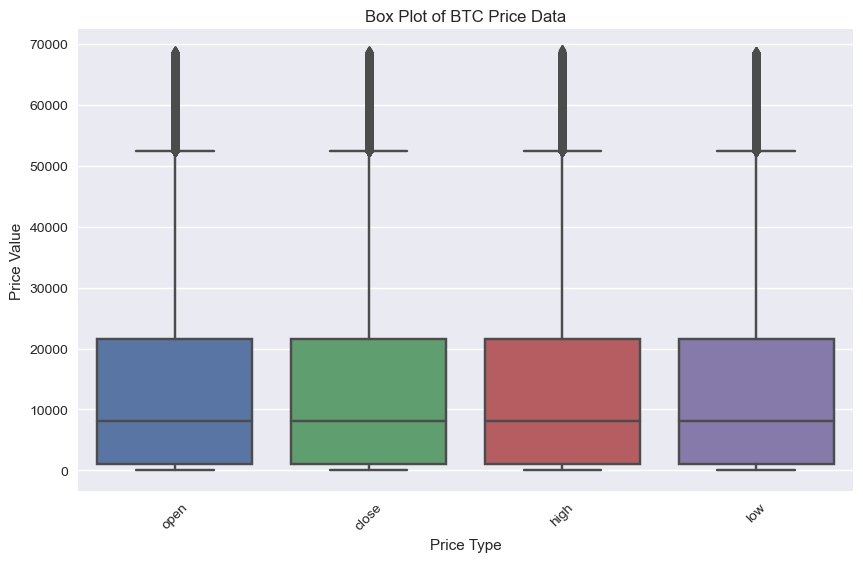

In [18]:
# Create a box plot for BTC price data
plt.figure(figsize=(10, 6))
sns.boxplot(data=BTC[['open', 'close', 'high', 'low']])
plt.title('Box Plot of BTC Price Data')
plt.xlabel('Price Type')
plt.ylabel('Price Value')
plt.xticks(rotation=45)
plt.show()

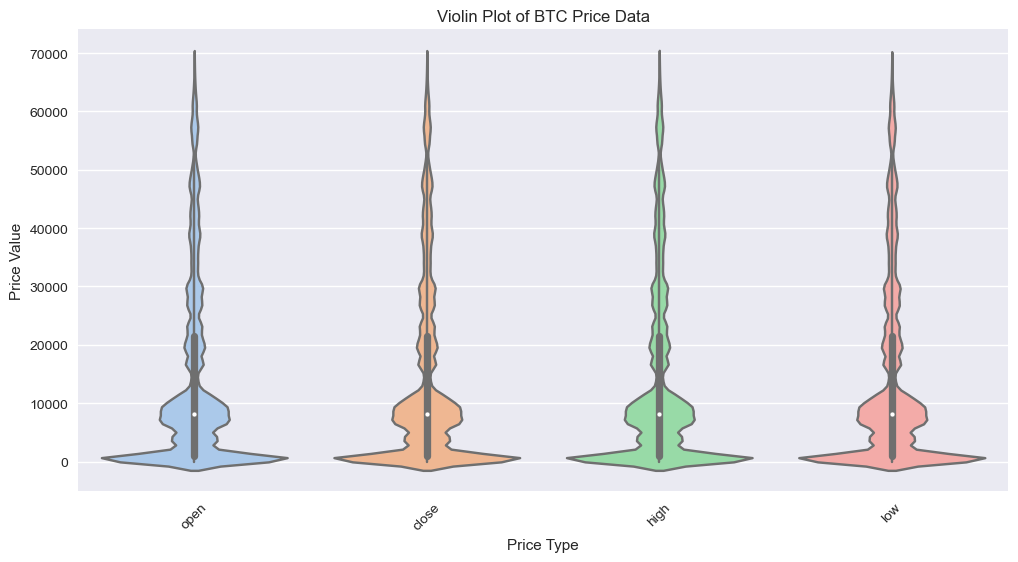

In [19]:
# Create a violin plot for BTC price data
plt.figure(figsize=(12, 6))
sns.violinplot(data=BTC[['open', 'close', 'high', 'low']], inner='box', palette='pastel')
plt.title('Violin Plot of BTC Price Data')
plt.xlabel('Price Type')
plt.ylabel('Price Value')
plt.xticks(rotation=45)
plt.show()

In [20]:
display(BTC_1hr['volume'].idxmax())
display(BTC_1hr.loc[BTC_1hr['volume'].idxmax()])
display(pd.DataFrame(BTC_1hr.nlargest(10, 'volume')).sort_index())

display(BTC_4hr['volume'].idxmax())
display(BTC_4hr.loc[BTC_4hr['volume'].idxmax()])
display(pd.DataFrame(BTC_4hr.nlargest(10, 'volume')).sort_index())

display(BTC_daily['volume'].idxmax())
display(BTC_daily.loc[BTC_daily['volume'].idxmax()])
display(pd.DataFrame(BTC_daily.nlargest(10, 'volume')).sort_index())

display(BTC_monthly['volume'].idxmax())
display(BTC_monthly.loc[BTC_monthly['volume'].idxmax()])
display(pd.DataFrame(BTC_monthly.nlargest(10, 'volume')).sort_index())

Timestamp('2015-08-18 23:00:00')

open                  251.1000
high                  251.7500
low                   162.0000
close                 214.0000
volume             51,263.7658
Return                 -0.1475
Total Traded   10,970,445.8760
Name: 2015-08-18 23:00:00, dtype: float64

,open,high,low,close,volume,Return,Total Traded
time,,,,,,,
2015-01-14 07:00:00,207.1800,210.3600,166.4500,186.0000,"47,551.9894",-0.1013,"8,844,670.0206"
2015-08-18 23:00:00,251.1000,251.7500,162.0000,214.0000,"51,263.7658",-0.1475,"10,970,445.8760"
2015-08-19 00:00:00,214.0900,255.0800,198.0000,229.0100,"30,202.5018",0.0701,"6,916,674.9317"
2015-11-03 19:00:00,422.1000,423.8800,375.0200,393.6700,"28,402.8738",-0.0671,"11,181,359.3461"
2015-11-04 21:00:00,469.2000,469.8900,405.0000,421.0000,"26,402.0930",-0.1027,"11,115,281.1502"
2015-11-04 22:00:00,421.9900,438.5500,366.6600,391.0400,"30,374.1325",-0.0712,"11,877,500.7830"
2015-12-12 04:00:00,470.2900,471.0000,414.6000,426.2900,"27,488.0194",-0.0935,"11,717,867.7932"
2017-03-10 21:00:00,"1,276.5000","1,276.5000",958.5000,"1,101.0000","40,141.2748",-0.1378,"44,195,543.5033"
2017-11-29 19:00:00,"10,313.0000","10,345.0000","9,000.0000","9,500.0000","26,247.2231",-0.0790,"249,348,619.5091"


Timestamp('2015-11-04 20:00:00')

open                  469.9500
high                  471.9700
low                   366.6600
close                 409.2400
volume             78,481.6668
Return                 -0.1292
Total Traded   32,117,837.3373
Name: 2015-11-04 20:00:00, dtype: float64

,open,high,low,close,volume,Return,Total Traded
time,,,,,,,
2015-01-14 04:00:00,220.4600,222.0700,166.4500,186.0000,"74,298.5064",-0.1578,"13,819,522.1925"
2015-01-14 08:00:00,186.1100,224.7600,184.0000,194.9900,"63,338.0997",0.0483,"12,350,296.0576"
2015-01-26 00:00:00,254.7200,298.0000,254.6500,288.1000,"62,907.2762",0.1310,"18,123,586.2780"
2015-08-18 20:00:00,253.3000,253.3000,162.0000,214.0000,"74,083.5221",-0.1552,"15,853,873.7350"
2015-11-03 16:00:00,394.6200,423.8800,375.0200,393.6700,"67,740.5806",0.0001,"26,667,434.3783"
2015-11-04 12:00:00,473.8900,504.0000,456.4100,485.0000,"55,643.5169",0.0247,"26,987,105.7148"
2015-11-04 20:00:00,469.9500,471.9700,366.6600,409.2400,"78,481.6668",-0.1292,"32,117,837.3373"
2017-03-10 20:00:00,"1,263.6000","1,293.0000",958.5000,"1,115.4000","54,200.4445",-0.1172,"60,455,175.8349"
2017-09-15 12:00:00,"3,014.0000","3,689.0000","3,005.0000","3,670.0000","59,165.6026",0.2181,"217,137,761.4946"


Timestamp('2015-11-04 00:00:00')

open                   404.9800
high                   504.0000
low                    366.6600
close                  409.2400
volume             274,470.2382
Return                   0.0105
Total Traded   112,324,200.2949
Name: 2015-11-04 00:00:00, dtype: float64

,open,high,low,close,volume,Return,Total Traded
time,,,,,,,
2015-01-14,228.4900,228.4900,166.4500,182.0000,"269,565.2998",-0.2020,"49,060,884.5627"
2015-01-15,181.0000,230.7400,179.0500,209.8100,"184,371.6535",0.1528,"38,683,016.6276"
2015-01-26,254.7200,315.0000,254.6500,276.0100,"205,992.0247",0.0835,"56,855,858.7317"
2015-11-03,365.0800,423.8800,361.1100,405.0000,"171,811.4742",0.1086,"69,583,647.0643"
2015-11-04,404.9800,504.0000,366.6600,409.2400,"274,470.2382",0.0105,"112,324,200.2949"
2017-09-15,"3,235.4000","3,809.0000","2,980.4000","3,697.1000","183,116.6815",0.1427,"677,000,683.2836"
2017-11-12,"6,299.0000","6,469.6000","5,400.2000","5,810.7000","172,712.4711",-0.0781,"1,003,580,355.5875"
2017-11-29,"9,895.2000","11,441.0000","9,000.0000","9,766.1000","182,839.7493",-0.0127,"1,785,631,275.6961"
2017-12-22,"15,645.0000","15,842.4300","10,700.0000","13,173.0000","178,636.9659",-0.1580,"2,353,184,751.8295"


Timestamp('2017-12-31 00:00:00')

open                    9,907.0000
high                   19,891.0000
low                     9,370.1000
close                  13,769.0000
volume              2,257,991.8007
Return                      0.3898
Total Traded   31,090,289,103.9920
Name: 2017-12-31 00:00:00, dtype: float64

,open,high,low,close,volume,Return,Total Traded
time,,,,,,,
2015-01-31,322.3100,322.9000,166.4500,215.8000,"2,054,762.9610",-0.3821,"443,417,846.9867"
2015-11-30,316.0000,504.0000,300.2800,376.8800,"1,638,014.1104",0.1927,"617,334,757.9327"
2016-06-30,530.6900,789.7800,523.7500,674.7400,"1,677,574.5364",0.6212,"1,131,926,642.6954"
2017-09-30,"4,718.2000","4,970.0000","2,980.4000","4,367.1000","1,504,907.6444",-0.0744,"6,572,082,173.7200"
2017-10-31,"4,367.1000","6,481.5000","4,133.0000","6,455.1000","1,360,463.0754",0.4781,"8,781,925,198.0190"
2017-11-30,"6,455.0000","11,441.0000","5,400.2000","9,907.0000","2,118,904.5674",0.5348,"20,991,987,548.7843"
2017-12-31,"9,907.0000","19,891.0000","9,370.1000","13,769.0000","2,257,991.8007",0.3898,"31,090,289,103.9920"
2018-01-31,"13,763.0000","17,252.0000","9,231.1000","10,267.0000","1,615,808.2330",-0.2543,"16,589,503,127.8103"
2018-02-28,"10,268.0000","11,788.0000","6,000.0000","10,315.0000","1,930,204.8770",0.0047,"19,910,063,306.1343"


In [21]:
# # Plot candlestick chart
# mpf.plot(BTC, type='candle', style='yahoo', title="BTC Candlestick Chart")
# plt.show()

# # Assuming BTC is your DataFrame with 'time' as the index and OHLC data
# BTC['date'] = BTC.index.astype(int) // 10**9  # Convert Timestamp to Unix timestamp (seconds since epoch)

# fig, ax = plt.subplots()
# candlestick_ohlc(ax, BTC[['date', 'open', 'high', 'low', 'close']].values, width=0.6)
# plt.show()

In [22]:
# Create new DataFrames for each 'close' and 'Return' column
BTC_1min_close = pd.DataFrame({'close': BTC['close']})
BTC_1hr_close = BTC_1hr[['close', 'Return']]
BTC_4hr_close = BTC_4hr[['close', 'Return']]
BTC_daily_close = BTC_daily[['close', 'Return']]
BTC_monthly_close = BTC_monthly[['close', 'Return']]

In [23]:
display(BTC_1min_close.head(3))
display(BTC_1hr_close.head(3))
display(BTC_4hr_close.head(3))
display(BTC_daily_close.head(3))
display(BTC_monthly_close.head(3))

,close
time,
2013-04-01 00:07:00,93.3000
2013-04-01 00:08:00,100.0000
2013-04-01 00:09:00,93.3000


,close,Return
time,,
2013-04-01 01:00:00,93.1000,0.0000
2013-04-01 02:00:00,93.7400,0.0069
2013-04-01 03:00:00,92.7000,-0.0111


,close,Return
time,,
2013-04-01 04:00:00,94.0000,0.0140
2013-04-01 08:00:00,96.0000,0.0213
2013-04-01 12:00:00,102.2000,0.0646


,close,Return
time,,
2013-04-02,118.2294,0.1368
2013-04-03,134.7000,0.1393
2013-04-04,132.8990,-0.0134


,close,Return
time,,
2013-05-31,127.9000,-0.0856
2013-06-30,89.5500,-0.2998
2013-07-31,98.1800,0.0964


## Measuring BTC Performance with MEAN Returns and STD of Returns

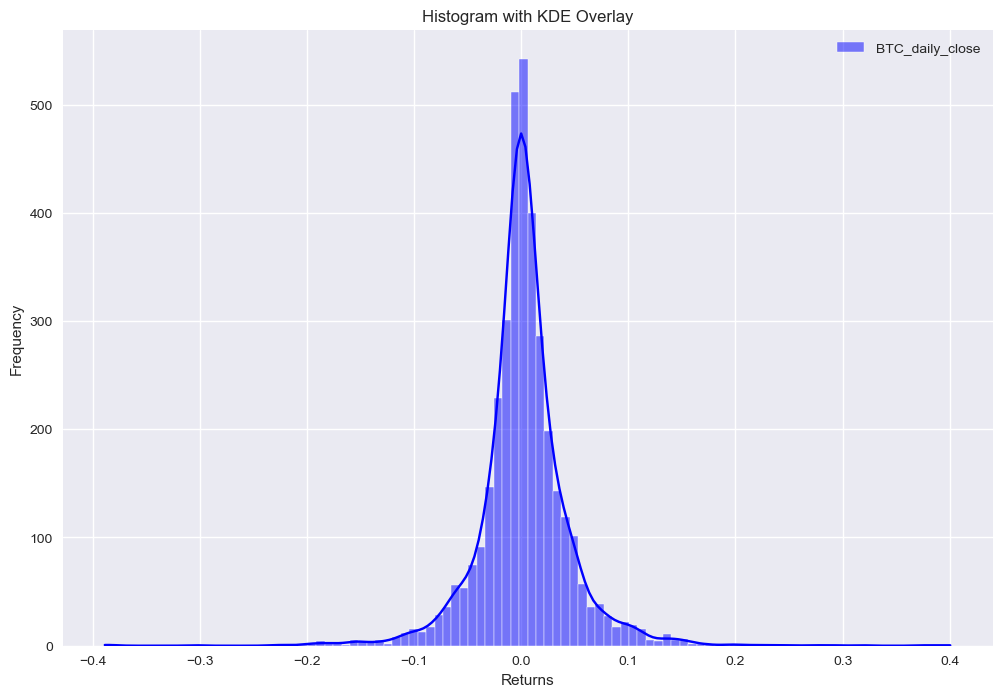

In [24]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a histogram
sns.histplot(BTC_daily_close['Return'], bins=100, kde=True, ax=ax, color='blue', label='BTC_daily_close')

# Set labels and title
ax.set_xlabel('Returns')
ax.set_ylabel('Frequency')
ax.set_title('Histogram with KDE Overlay')

# Show legend
plt.legend()

# Show the plot
plt.show()

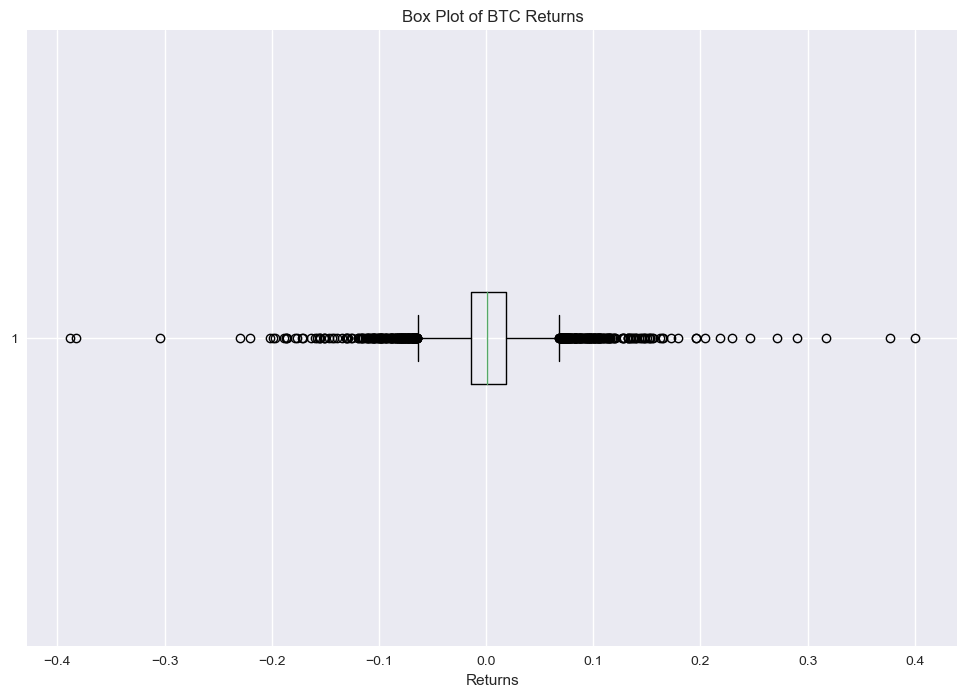

In [25]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a box plot
ax.boxplot(BTC_daily_close['Return'], vert=False)

# Set labels and title
ax.set_xlabel('Returns')
ax.set_title('Box Plot of BTC Returns')

# Show the plot
plt.show()

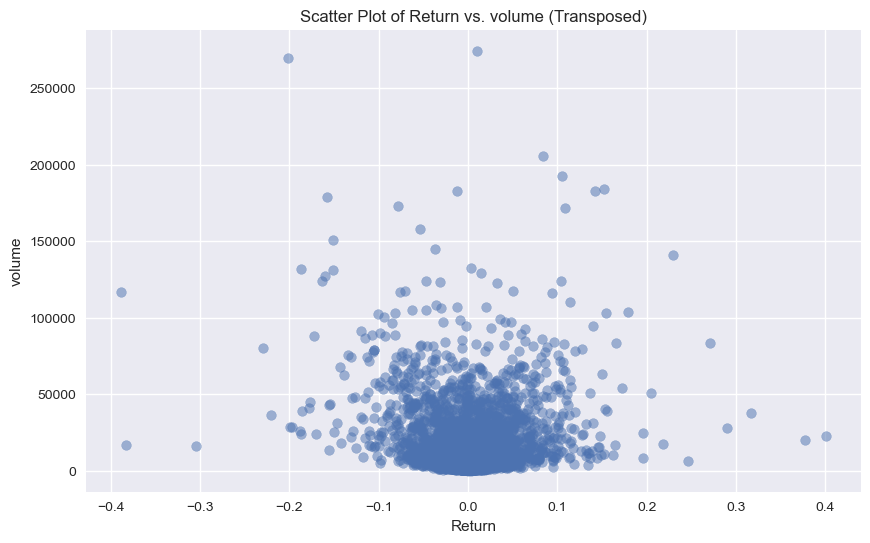

In [26]:
# Assuming you have BTC_daily_CV DataFrame with 'Return' and 'volume' columns
BTC_daily_CV = BTC_daily[['Return', 'volume']]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with 'Return' on the x-axis and 'volume' on the y-axis
ax.scatter(BTC_daily_CV['Return'], BTC_daily_CV['volume'], alpha=0.5)

# Set labels and title
ax.set_xlabel('Return')
ax.set_ylabel('volume')
ax.set_title('Scatter Plot of Return vs. volume (Transposed)')

# Show the plot
plt.show()

In [27]:
daily_mean_return = BTC_daily_close['Return'].mean()
var_daily_return = BTC_daily_close['Return'].var()
std_daily_return = np.sqrt(var_daily_return)
ann_mean_return = BTC_daily_close['Return'].mean() * 365
ann_var_return = BTC_daily_close['Return'].var() * 365
ann_std_return = np.sqrt(ann_var_return) * 365

In [28]:
# Create a DataFrame to display the statistics
statistics_df = pd.DataFrame({
    'Statistic': ['Daily Mean Return', 'Daily Variance of Return', 'Daily Standard Deviation of Return',
                  'Annualized Mean Return', 'Annualized Variance of Return', 'Annualized Standard Deviation of Return'],
    'Value': [daily_mean_return, var_daily_return, std_daily_return, ann_mean_return, ann_var_return, ann_std_return]
})

# Set the 'Statistic' column as the index (optional)
statistics_df.set_index('Statistic', inplace=True)

# Display the DataFrame
statistics_df

,Value
Statistic,
Daily Mean Return,0.0025
Daily Variance of Return,0.0019
Daily Standard Deviation of Return,0.0438
Annualized Mean Return,0.9028
Annualized Variance of Return,0.7008
Annualized Standard Deviation of Return,305.5516


In [29]:
BTC_daily_close.describe().T.loc[:, ['mean', 'std']]

,mean,std
close,"12,524.4025","15,655.3765"
Return,0.0025,0.0438


## BackTesting

### Momentum

__Positions__:

+1: Investing in BTC (__long__ position) <br>
-1: Short Selling BTC (__short__ position)<br>
0: No position (__neutral__)

__Momentum Strategies__:

-__Buy and Hold__ (Basic Strategy - passive): Initially Investing into BTC and do nothing (Position: +1 on any given day)
____
-__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into BTC tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ BTC tomorrow if today´s return was __negative__

if I invested $1 in BTC at the beginning of the time series, how much would is be worth today?


The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

In [30]:
BTC_daily_close['Positions'] = np.sign(BTC_daily_close['Return'])
BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
BTC_daily_close["Strategy"] = BTC_daily_close.Strategy_Ret.add(1, fill_value = 0).cumprod() * BTC_daily_close.iloc[0, 0]

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/3151029933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['Positions'] = np.sign(BTC_daily_close['Return'])
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/3151029933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/3151029933.py:3: SettingWi

In summary, this code calculates the daily returns, generates trading signals based on the sign of returns (long or short positions),and simulates the performance of a trading strategy by tracking the cumulative portfolio value over time. 
The strategy's returns are calculated by assuming an initial investment of 1 unit, and the resulting portfolio value shows how the investment would have grown or shrunk over the given time period based on the strategy.

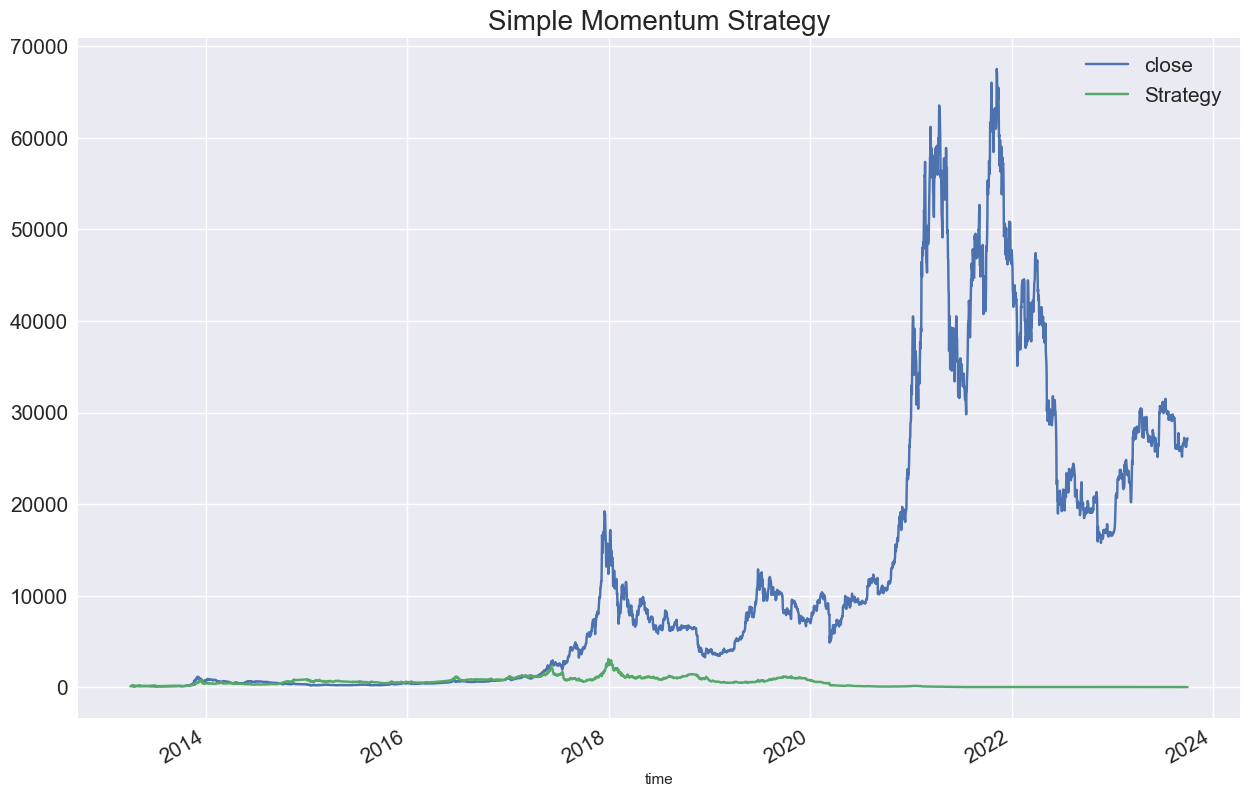

In [31]:
BTC_daily_close[["close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Momentum Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

The resulting DataFrame will include columns for annualized return ('Return') and annualized risk ('Risk') for both the asset and the strategy, providing insights into their performance on an annual basis.

In [32]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 365
    summary["Risk"] = summary["std"] * np.sqrt(365)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [33]:
summary_ann(BTC_daily_close[["Return", "Strategy_Ret"]])

,Return,Risk
Return,0.9028,0.8371
Strategy_Ret,0.1919,0.8374


### Contrarian

__Positions__:

+1: Investing in BTC (__long__ position) <br>
-1: Short Selling BTC (__short__ position)<br>
0: No position (__neutral__)

__Contrarian Strategies__:

-__Buy and Hold__ (Basic Strategy - passive): Initially Investing into BTC and do nothing (Position: +1 on any given day)
____
-__Simple Contrarian__ (Strategy to be tested): <br>
__a) Short Selling (-1)__ BTC tomorrow if today´s return was __positive__ <br>
__b) Investing (+1)__ into BTC tomorrow if today´s return was __negative__

In [34]:
BTC_daily_close = BTC_daily[['close', 'Return']]
BTC_daily_close['Positions'] = -np.sign(BTC_daily_close['Return'])
BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
BTC_daily_close["Strategy"] = BTC_daily_close.Strategy_Ret.add(1, fill_value = 0).cumprod() * BTC_daily_close.iloc[0, 0]

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1664335139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['Positions'] = -np.sign(BTC_daily_close['Return'])
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1664335139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1664335139.py:4: SettingW

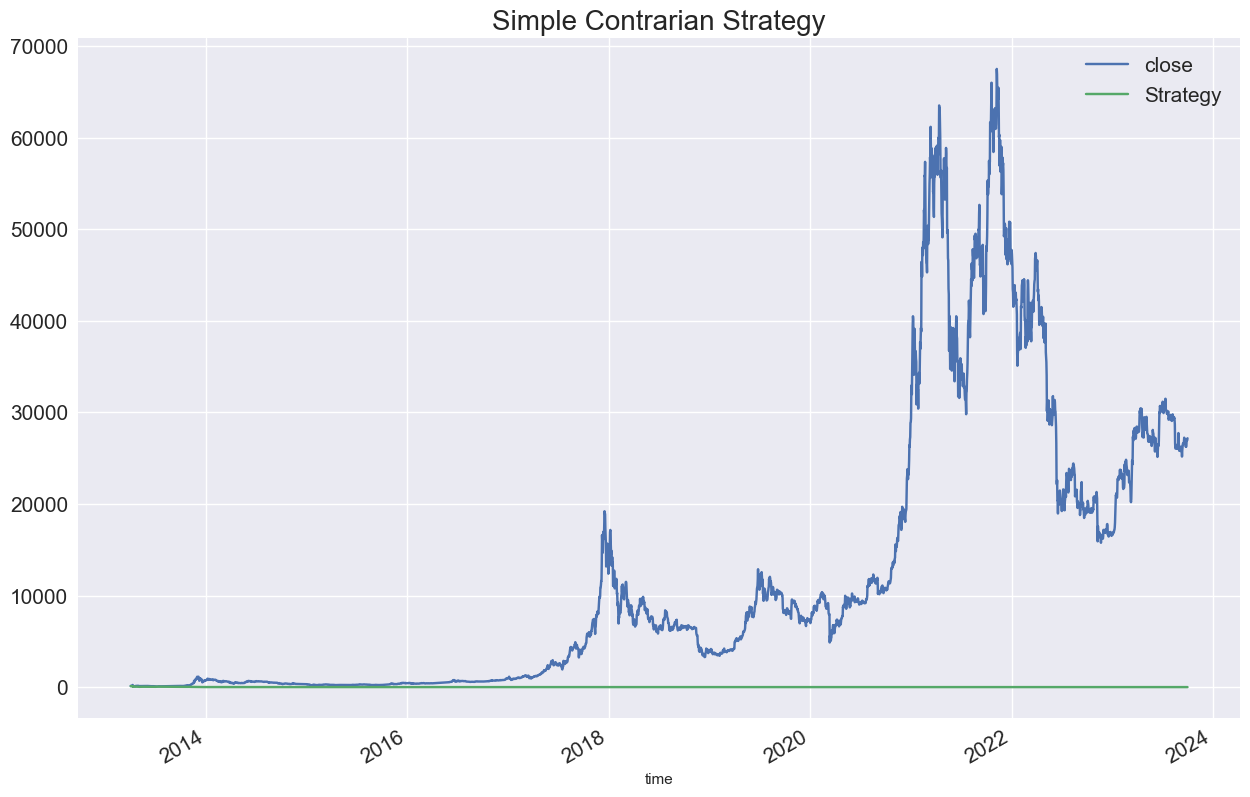

In [35]:
BTC_daily_close[["close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [36]:
summary_ann(BTC_daily_close[["Return", "Strategy_Ret"]])

,Return,Risk
Return,0.9028,0.8371
Strategy_Ret,-0.1919,0.8374


### More complex Strategies & Backtesting vs. Fitting

If the daily return is greater than 0.3 (assuming it's a threshold for a significant positive return), it assigns a position of -1 (indicating a short position).
Otherwise, it assigns a position of 1 (indicating a long position).

In [37]:
BTC_daily_close = BTC_daily[['close', 'Return']]
BTC_daily_close['Positions'] = np.where(BTC_daily_close['Return'] > 0.3, -1, 1)
BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
BTC_daily_close["Strategy"] = BTC_daily_close.Strategy_Ret.add(1, fill_value = 0).cumprod() * BTC_daily_close.iloc[0, 0]

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1623829526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['Positions'] = np.where(BTC_daily_close['Return'] > 0.3, -1, 1)
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1623829526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1623829526.p

In [38]:
BTC_daily_close

,close,Return,Positions,Strategy_Ret,Strategy
time,,,,,
2013-04-02,118.2294,0.1368,1,NaN,118.2294
2013-04-03,134.7000,0.1393,1,0.1393,134.7000
2013-04-04,132.8990,-0.0134,1,-0.0134,132.8990
2013-04-05,142.3000,0.0707,1,0.0707,142.3000
2013-04-06,143.0500,0.0053,1,0.0053,143.0500
...,...,...,...,...,...
2023-09-27,"26,391.0000",0.0056,1,0.0056,"34,719.8655"
2023-09-28,"27,046.0000",0.0248,1,0.0248,"35,581.5802"
2023-09-29,"26,929.0000",-0.0043,1,-0.0043,"35,427.6556"


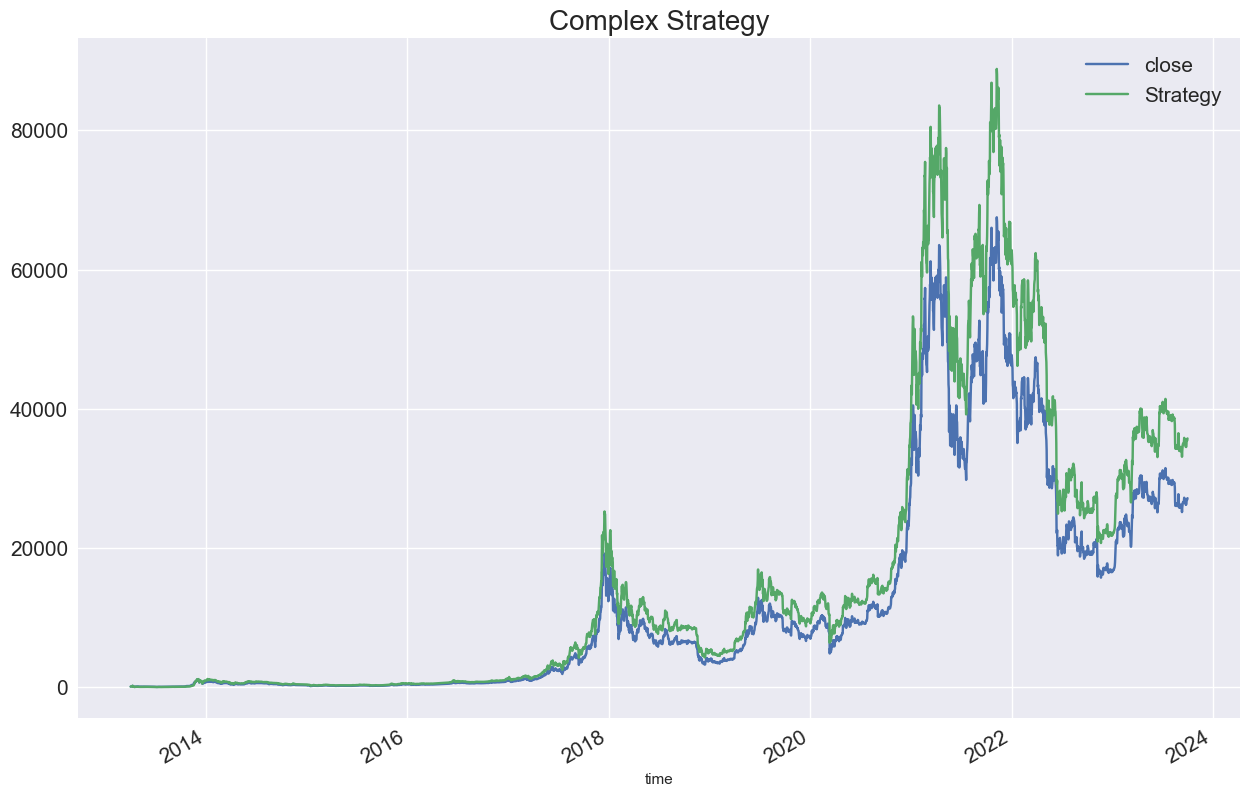

In [39]:
BTC_daily_close[["close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Complex Strategy", fontsize = 20)
plt.show()

In [40]:
summary_ann(BTC_daily_close[["Return", "Strategy_Ret"]])

,Return,Risk
Return,0.9028,0.8371
Strategy_Ret,0.9163,0.8361


Even if a Strategy __seems to outperform__ the basic Strategy, the following issues need to be considered/analyzed as well: <br>
- Backtesting vs. Fitting -> Was the Strategy __fitted__ and optimized on __historical data__? __Forward Testing__ is required!<br>
- __Transaction Costs__ -> Changing Positions trigger Cost. Include Costs!<br>

### (SMA) Simple Moving Averages

In [41]:
BTC_daily_close = BTC_daily[['close', 'Return']]
BTC_daily_close["SMA50"] = BTC_daily_close.close.rolling(window = 50).mean()
BTC_daily_close["SMA200"] = BTC_daily_close.close.rolling(window = 200).mean()
BTC_daily_close.dropna(inplace= True)

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/2626840422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["SMA50"] = BTC_daily_close.close.rolling(window = 50).mean()
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/2626840422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["SMA200"] = BTC_daily_close.close.rolling(window = 200).mean()
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/2626840422.py:4: SettingWithCopyWar

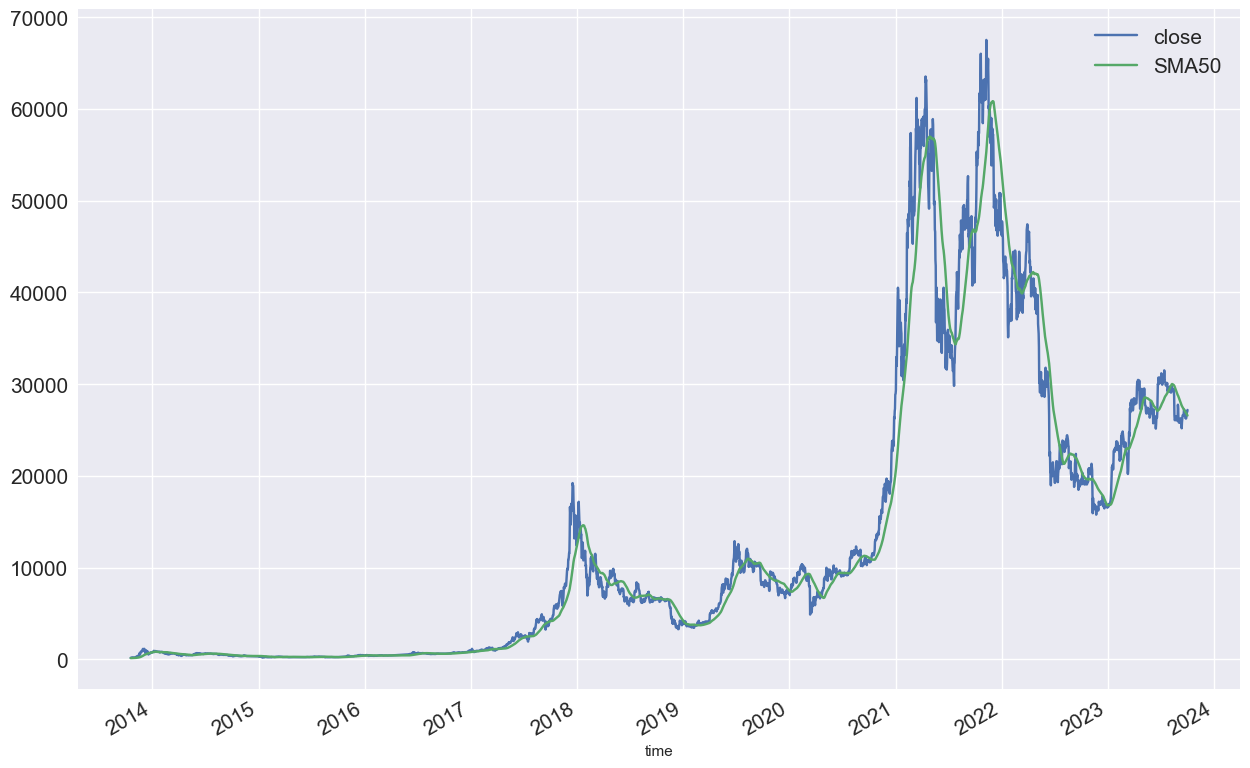

In [42]:
BTC_daily_close[["close", "SMA50"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

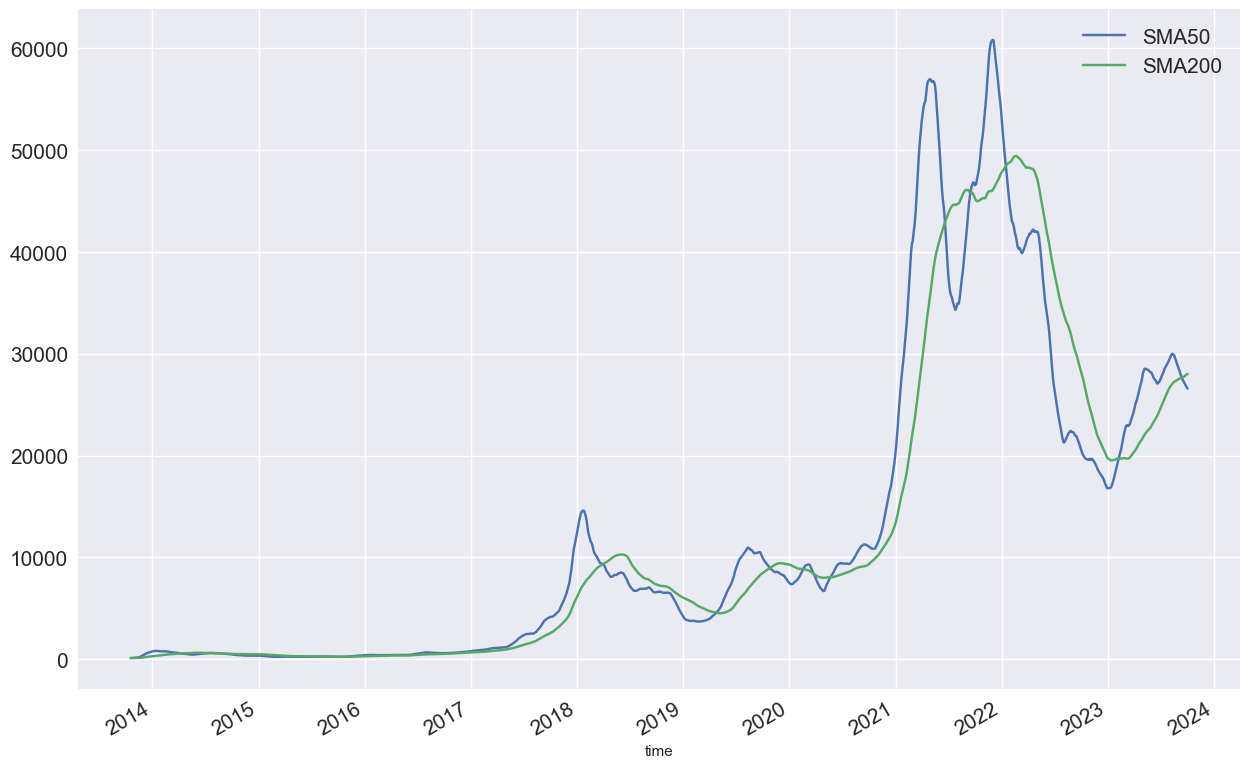

In [43]:
BTC_daily_close[["SMA50", "SMA200"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__SMA Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into BTC and do nothing (Position: +1 on all days)
___
-__SMA Crossover (Momentum)__ (Strategy to be tested): <br>
__a) Investing (+1)__: SMA50 __>__ SMA200 <br>
__b) Short Selling (-1)__: SMA50 __<__ SMA200

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/3804941517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['Positions'] = np.sign(BTC_daily_close.SMA50.sub(BTC_daily_close.SMA200))


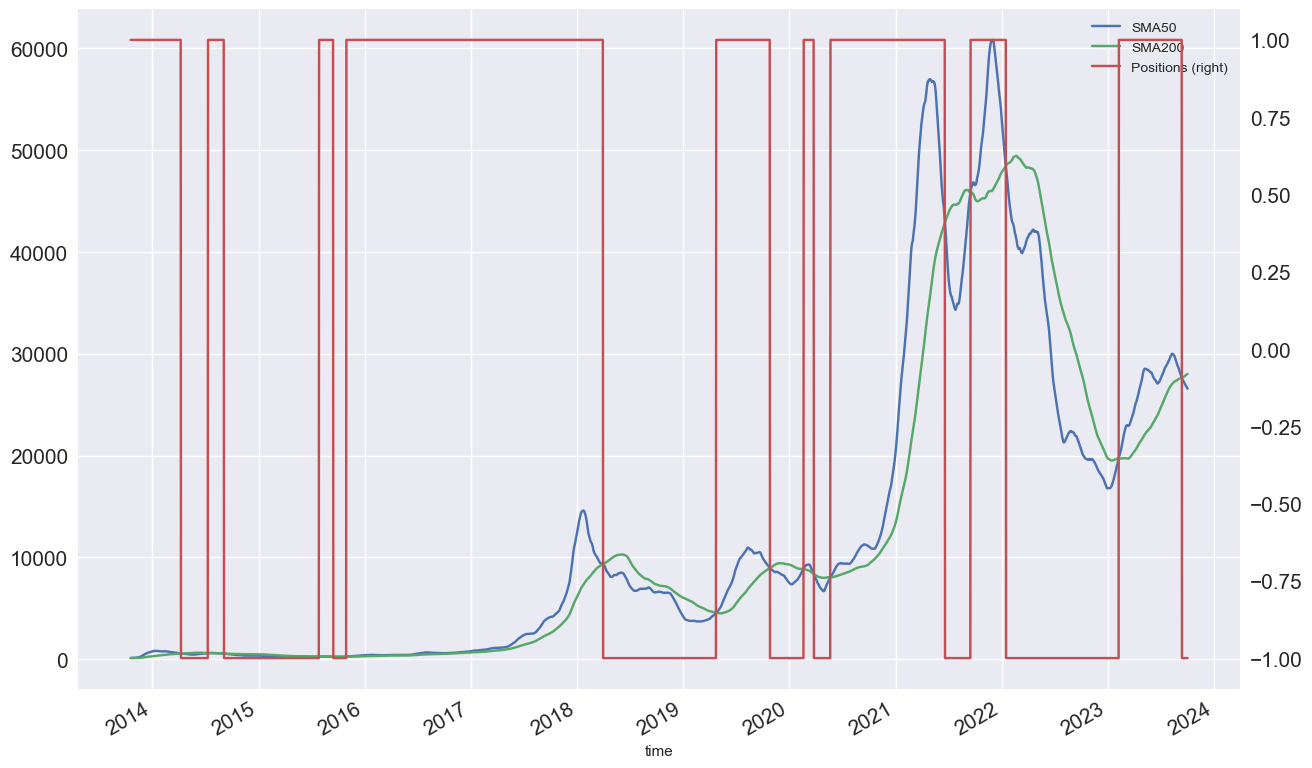

In [44]:
BTC_daily_close['Positions'] = np.sign(BTC_daily_close.SMA50.sub(BTC_daily_close.SMA200)) 
BTC_daily_close[['SMA50', 'SMA200', 'Positions']].plot(figsize=(15, 10), secondary_y='Positions', fontsize=15)
plt.show()

In [45]:
BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
BTC_daily_close["Strategy"] = BTC_daily_close.Strategy_Ret.add(1, fill_value = 0).cumprod() * BTC_daily_close.iloc[0, 0]

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/2918046063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/2918046063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["Strategy"] = BTC_daily_close.Strategy_Ret.add(1, fill_value = 0).cumprod() * BTC_daily_close.iloc[0, 0]


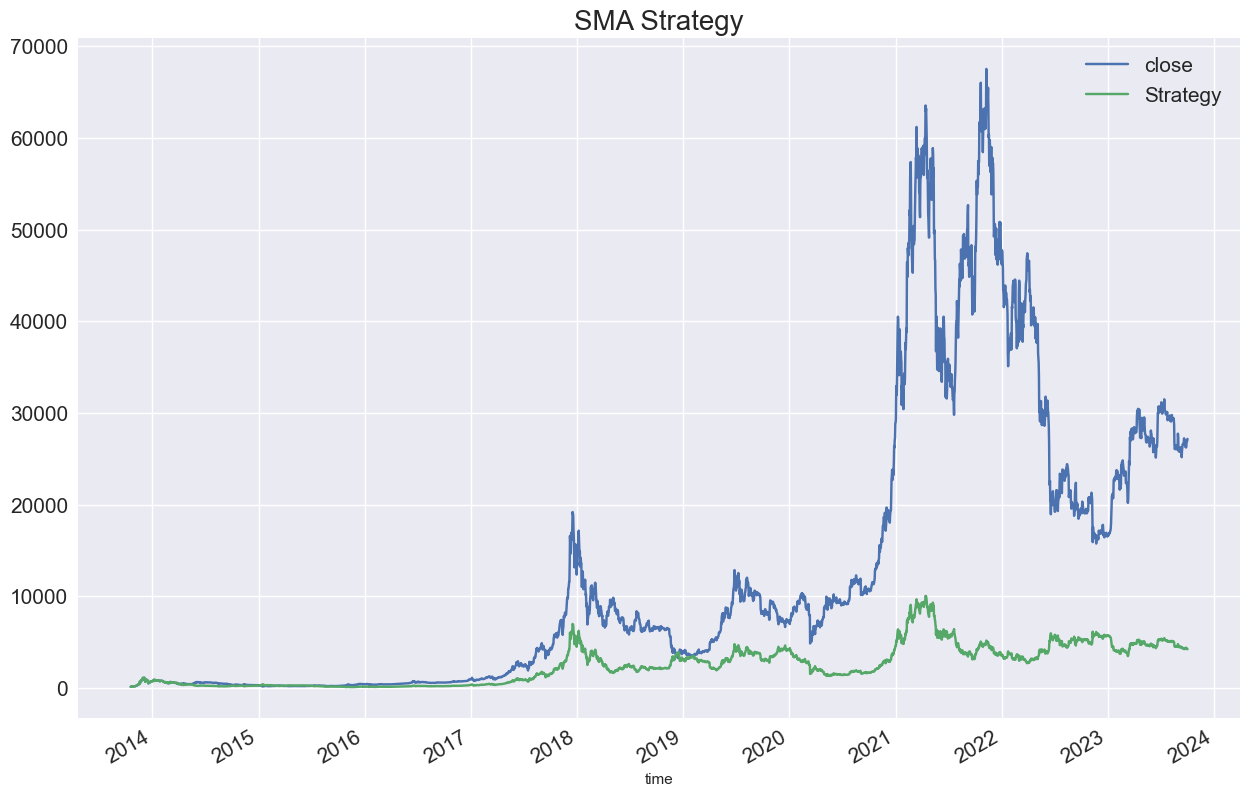

In [46]:
BTC_daily_close[["close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [48]:
summary_ann(BTC_daily_close[["Return", "Strategy_Ret"]])

,Return,Risk
Return,0.8646,0.7964
Strategy_Ret,0.6646,0.7968


/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/990419295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['Positions'] = -np.sign(BTC_daily_close.SMA50.sub(BTC_daily_close.SMA200))


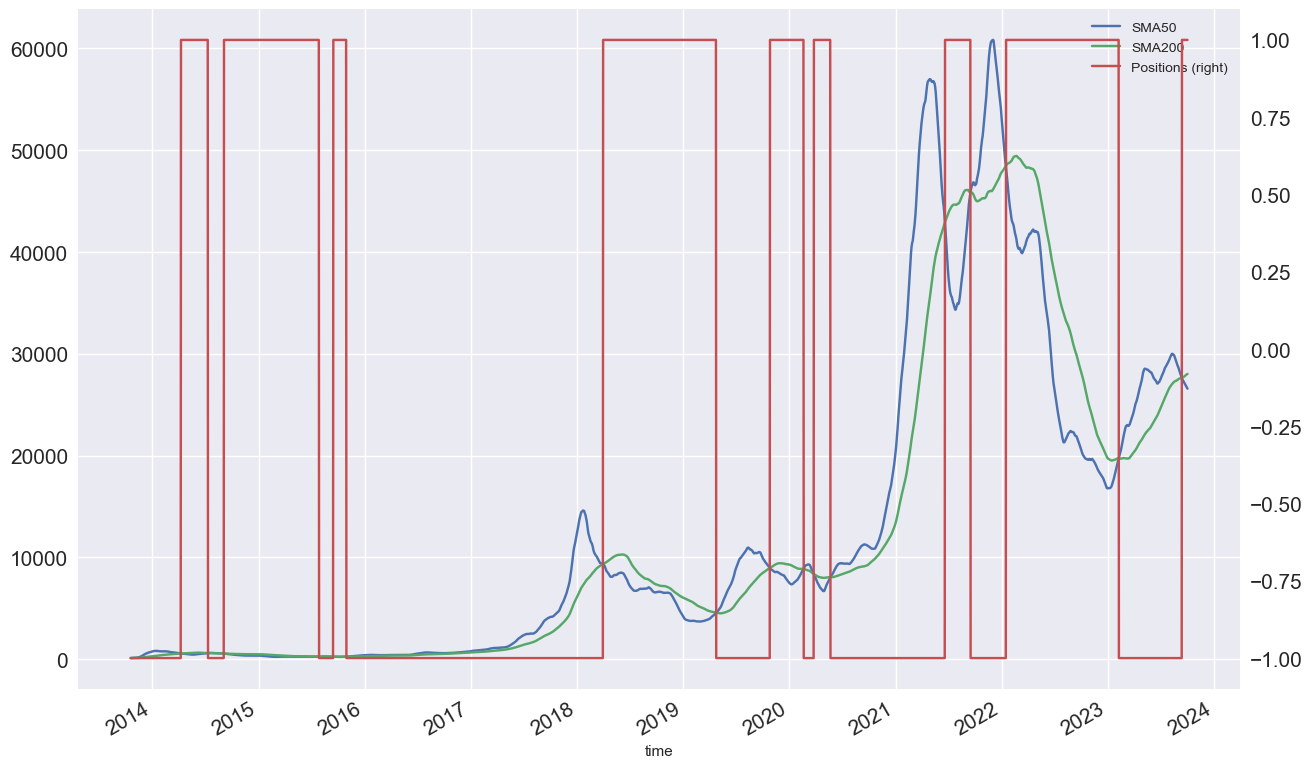

In [49]:
BTC_daily_close['Positions'] = -np.sign(BTC_daily_close.SMA50.sub(BTC_daily_close.SMA200)) 
BTC_daily_close[['SMA50', 'SMA200', 'Positions']].plot(figsize=(15, 10), secondary_y='Positions', fontsize=15)
plt.show()

In [50]:
BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
BTC_daily_close["Strategy"] = BTC_daily_close.Strategy_Ret.add(1, fill_value = 0).cumprod() * BTC_daily_close.iloc[0, 0]

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/2918046063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"].shift() * BTC_daily_close["Return"]
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/2918046063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["Strategy"] = BTC_daily_close.Strategy_Ret.add(1, fill_value = 0).cumprod() * BTC_daily_close.iloc[0, 0]


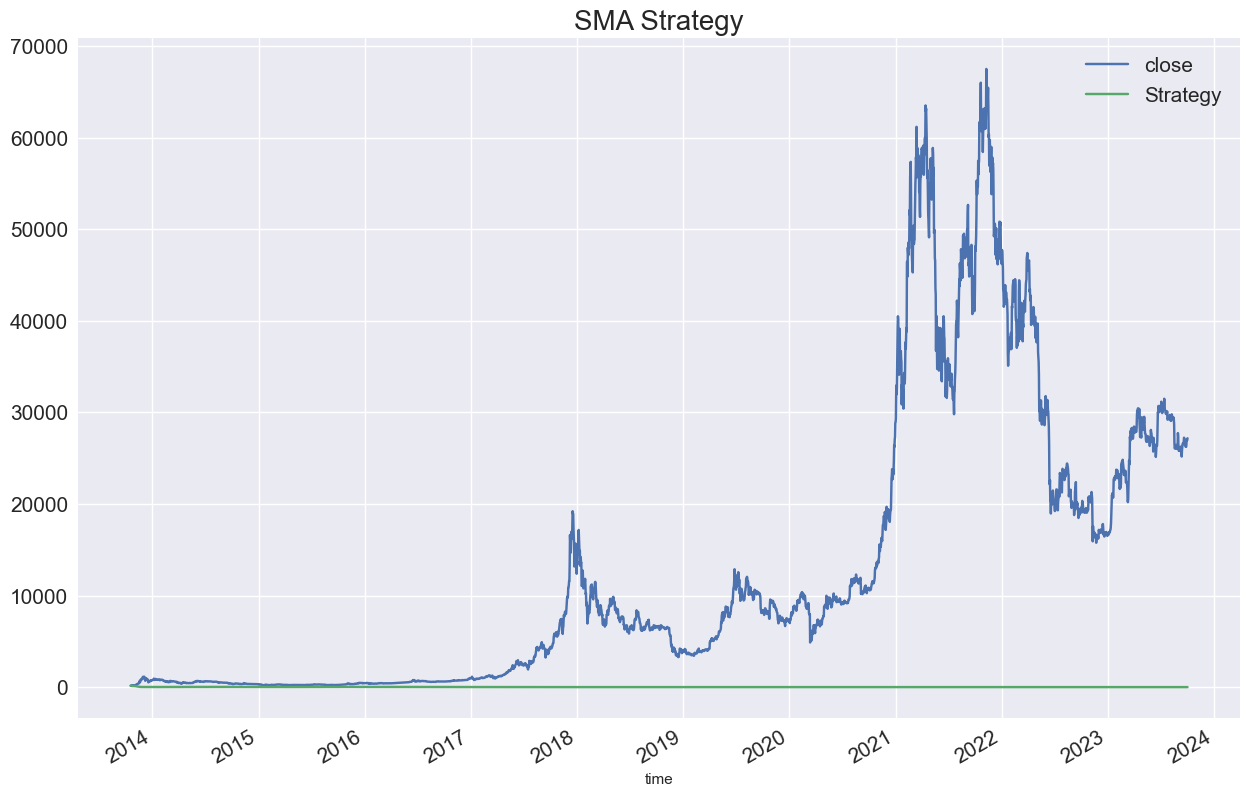

In [51]:
BTC_daily_close[["close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [52]:
summary_ann(BTC_daily_close[["Return", "Strategy_Ret"]])

,Return,Risk
Return,0.8646,0.7964
Strategy_Ret,-0.6646,0.7968


## EWMA Strategies
### Exponentially-weighted moving average

Basic SMA has some "weaknesses"
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behaviour, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an EWMA (Exponentially-weighted moving average).

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows)
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:

$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

__EWMA Strategies__:
__Exponentially-weighted moving average__

-__Buy and Hold__ (Basic Strategy): Initially Investing into BTC and do nothing (Position: +1 on all days)
___
-__EWMA Crossover (Momentum)__ (Strategy to be tested): <br>
__a) Investing (+1)__: When the asset's price is above its 12-period EWMA. <br>
__b) Short Selling (-1)__: When the asset's price is below or equal to its 12-period EWMA.

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1374303357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['EWMA12'] = BTC_daily_close['close'].ewm(span=12).mean()
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1374303357.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['Positions_EWMA12'] = np.where(BTC_daily_close['close'] > BTC_daily_close['EWMA12'], 1, -1)


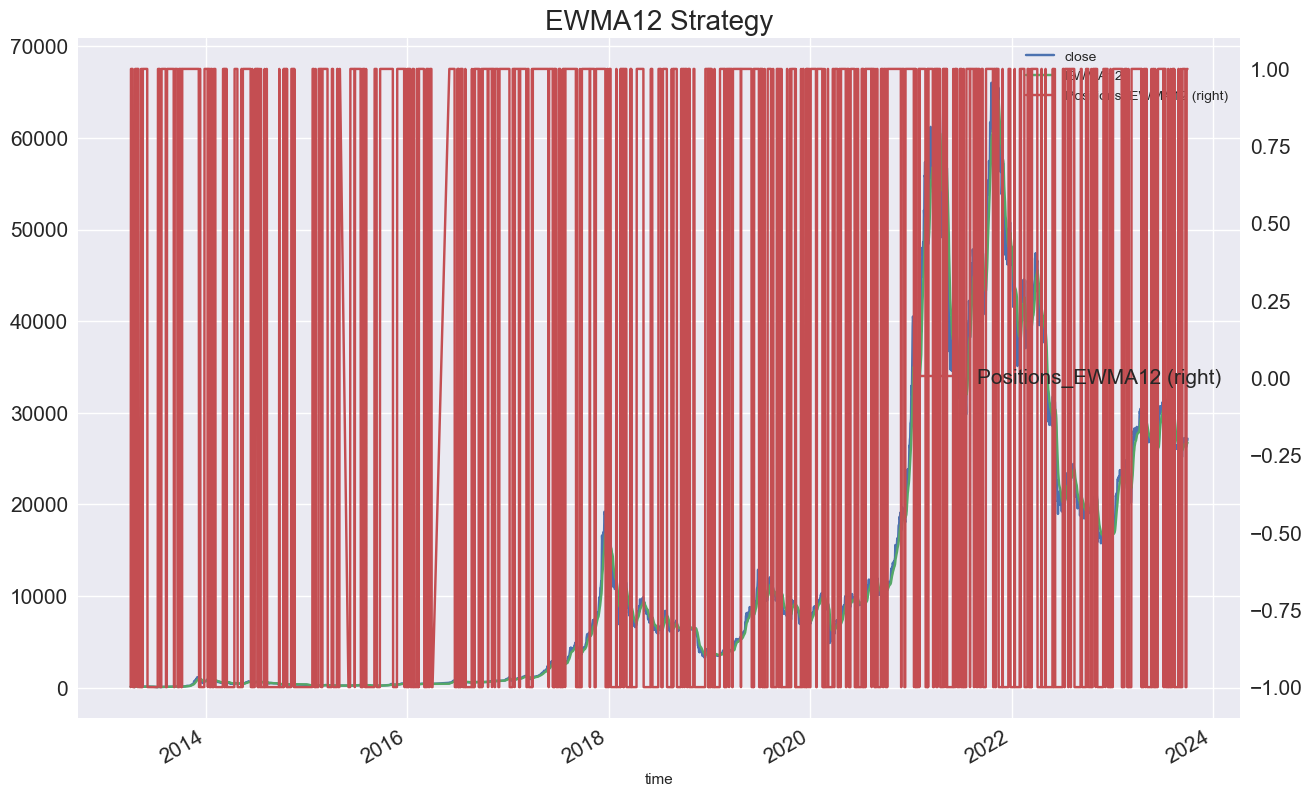

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1374303357.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['Strategy_Ret_EWMA12'] = BTC_daily_close['Positions_EWMA12'].shift() * BTC_daily_close['Return']
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1374303357.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['Strategy_EWMA12'] = (BTC_daily_close['Strategy_Ret_EWMA12'] + 1).cumprod() * BTC_daily_close.iloc[0, 0]
/var/folders/y4/h840

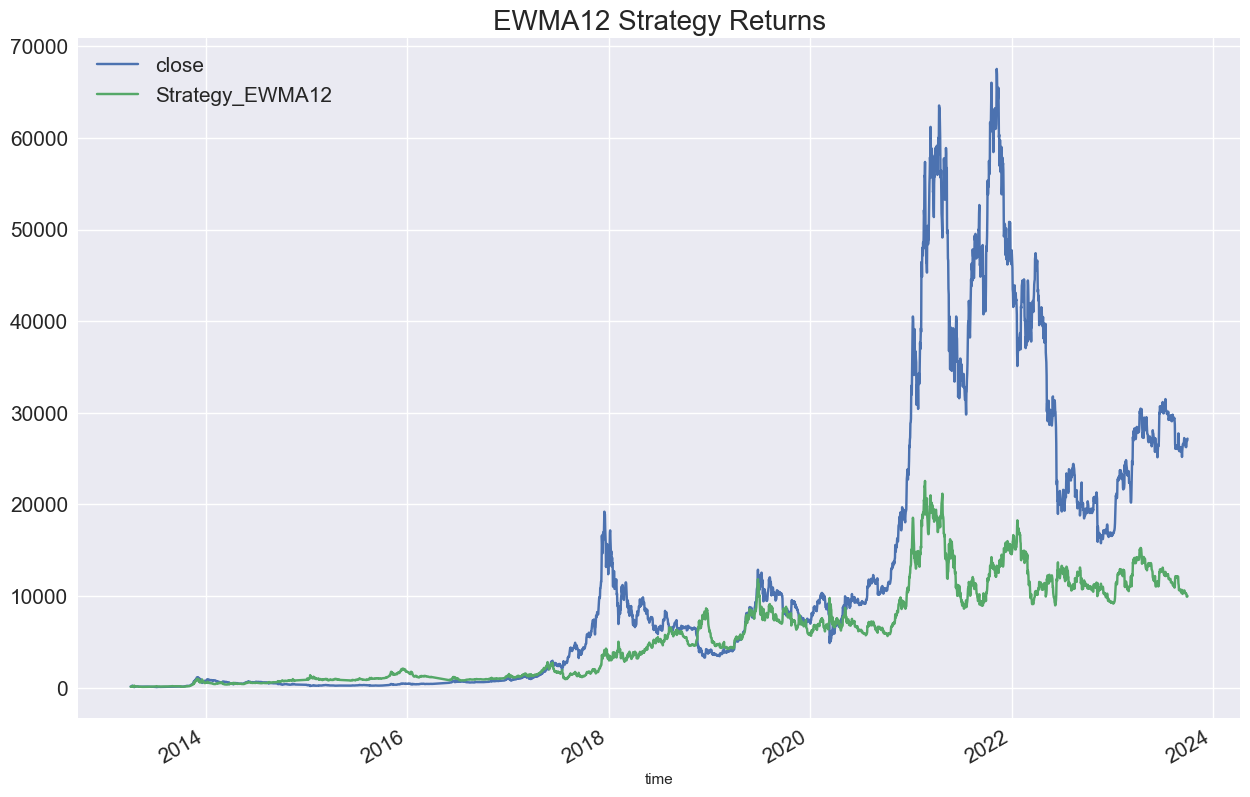

,Return,Risk
Return,0.8896,0.8362
Strategy_Ret_EWMA12,0.7891,0.8365


In [53]:
BTC_daily_close = BTC_daily[['close', 'Return']]

# Calculate the 12-period EWMA
BTC_daily_close['EWMA12'] = BTC_daily_close['close'].ewm(span=12).mean()

# Generate buy (+1) and sell (-1) signals based on the strategy rules
BTC_daily_close['Positions_EWMA12'] = np.where(BTC_daily_close['close'] > BTC_daily_close['EWMA12'], 1, -1)
# Plot the positions and strategy returns
BTC_daily_close[['close', 'EWMA12', 'Positions_EWMA12']].plot(figsize=(15, 10), secondary_y='Positions_EWMA12', fontsize=15)
plt.legend(fontsize=15)
plt.title("EWMA12 Strategy", fontsize=20)
plt.show()

# Calculate the strategy returns
BTC_daily_close['Strategy_Ret_EWMA12'] = BTC_daily_close['Positions_EWMA12'].shift() * BTC_daily_close['Return']
BTC_daily_close['Strategy_EWMA12'] = (BTC_daily_close['Strategy_Ret_EWMA12'] + 1).cumprod() * BTC_daily_close.iloc[0, 0]
BTC_daily_close.dropna(inplace= True)

# Plot the strategy returns
BTC_daily_close[['close', 'Strategy_EWMA12']].plot(figsize=(15, 10), fontsize=15)
plt.legend(fontsize=15)
plt.title("EWMA12 Strategy Returns", fontsize=20)
plt.show()

# Calculate summary statistics for the strategy returns
summary_ann(BTC_daily_close[['Return', 'Strategy_Ret_EWMA12']])

### Backtesting the Perfect Strategy (...in case you can predict the future...)

In [54]:
BTC_daily_close = BTC_daily[['close', 'Return']]
BTC_daily_close['Positions'] = np.sign(BTC_daily_close['Return'])
BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"] * BTC_daily_close["Return"]
BTC_daily_close["Strategy"] = BTC_daily_close.Strategy_Ret.add(1, fill_value = 0).cumprod() * BTC_daily_close.iloc[0, 0]

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/3839413096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close['Positions'] = np.sign(BTC_daily_close['Return'])
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/3839413096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["Strategy_Ret"] = BTC_daily_close["Positions"] * BTC_daily_close["Return"]
/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/3839413096.py:4: SettingWithCopyWa

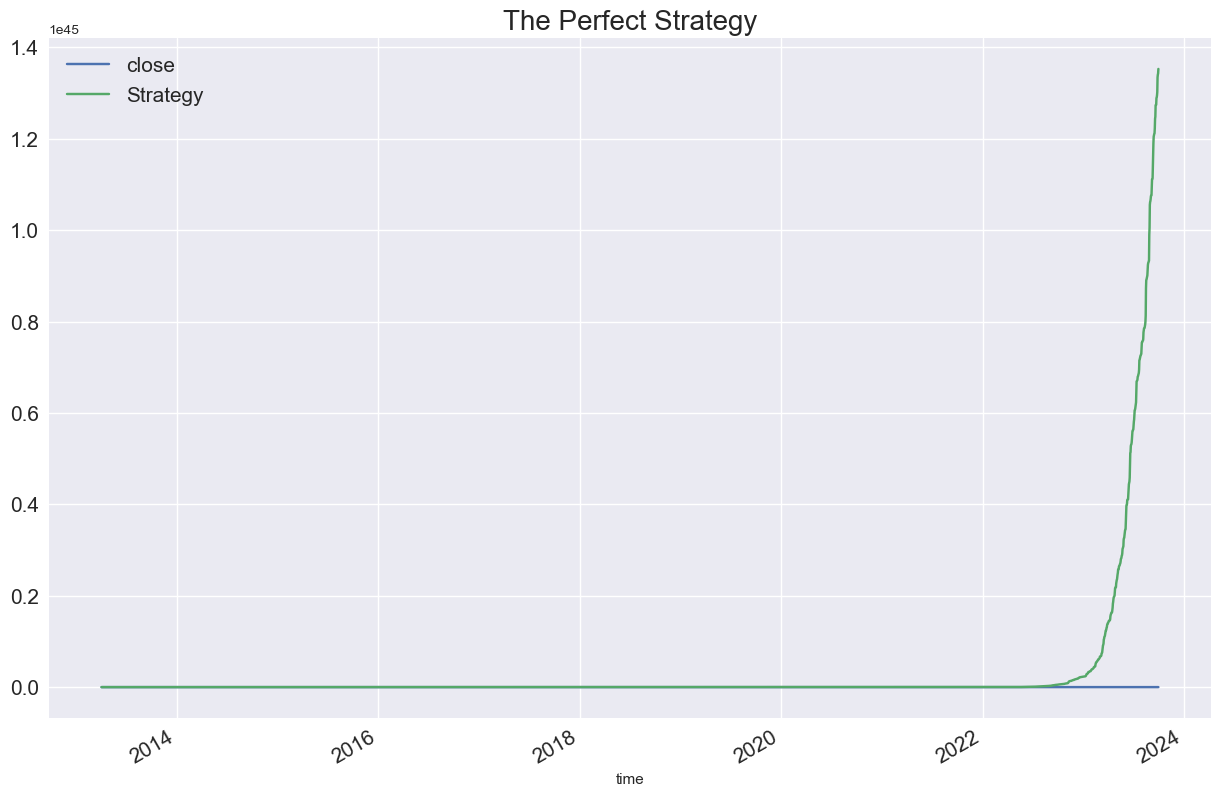

In [55]:
BTC_daily_close[["close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("The Perfect Strategy", fontsize = 20)
plt.show()

In [56]:
BTC_daily_close

,close,Return,Positions,Strategy_Ret,Strategy
time,,,,,
2013-04-02,118.2294,0.1368,1.0000,0.1368,134.4069
2013-04-03,134.7000,0.1393,1.0000,0.1393,153.1312
2013-04-04,132.8990,-0.0134,-1.0000,0.0134,155.1787
2013-04-05,142.3000,0.0707,1.0000,0.0707,166.1557
2013-04-06,143.0500,0.0053,1.0000,0.0053,167.0314
...,...,...,...,...,...
2023-09-27,"26,391.0000",0.0056,1.0000,0.0056,"1,302,241,078,155,126,058,928,753,312,920,864,1..."
2023-09-28,"27,046.0000",0.0248,1.0000,0.0248,"1,334,561,486,862,322,111,596,590,424,717,701,3..."
2023-09-29,"26,929.0000",-0.0043,-1.0000,0.0043,"1,340,334,750,707,729,579,893,435,781,544,156,5..."


In [57]:
summary_ann(BTC_daily_close[["Return", "Strategy_Ret"]])

,Return,Risk
Return,0.9028,0.8371
Strategy_Ret,10.1103,0.6503


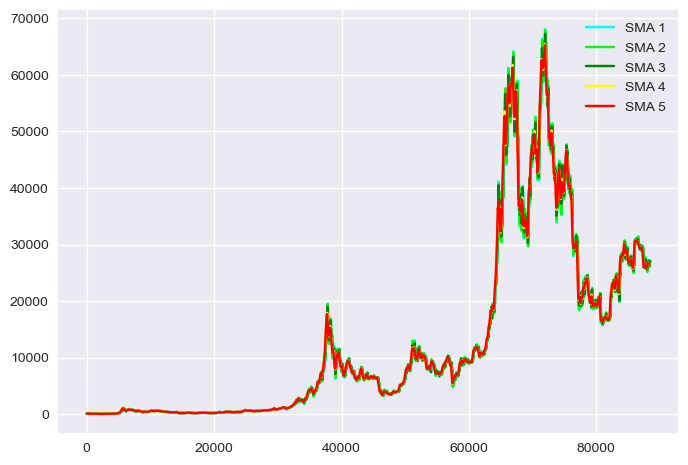

In [58]:
def sma(data, window):
    weights = np.repeat(1.0, window) / window
    return np.convolve(data, weights, 'valid')

sma1 = 8
sma_1 = sma(BTC_1hr_close['close'], sma1)
plt.plot(sma_1, label="SMA 1", color="aqua")

sma2 = 13
sma_2 = sma(BTC_1hr_close['close'], sma2)
plt.plot(sma_2, label="SMA 2", color="lime")

sma3 = 50
sma_3 = sma(BTC_1hr_close['close'], sma3)
plt.plot(sma_3, label="SMA 3", color="green")

sma4 = 161
sma_4 = sma(BTC_1hr_close['close'], sma4)
plt.plot(sma_4, label="SMA 4", color="yellow")

sma5 = 200
sma_5 = sma(BTC_1hr_close['close'], sma5)
plt.plot(sma_5, label="SMA 5", color="red")

plt.legend()
plt.show()

### Using Statsmodels to get the trend
The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

$y_t = \tau_t + \zeta_t$

The components are determined by minimizing the following quadratic loss function

$\min_{\\{ \tau_{t}\\} }\sum_{t}^{T}\zeta_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$

### Using Statsmodels to Get the Trend

The Hodrick-Prescott filter is a technique used in time series analysis to decompose a time series \(y_t\) into two distinct components: a trend component \(\tau_t\) and a cyclical (or residual) component \(\zeta_t\). These components are determined by minimizing a specific quadratic loss function.

The components are defined as follows:

- \(y_t\): This represents the original time series data, such as daily closing prices of Bitcoin (BTC).

- \(\tau_t\): This represents the trend component, which is an estimation of the underlying, long-term trend or pattern in the time series. It aims to capture the smooth and slowly changing part of the data.

- \(\zeta_t\): This represents the cyclical or residual component, which is the part of the data that cannot be explained by the trend. It captures shorter-term fluctuations and irregularities in the data.

The Hodrick-Prescott (HP) filter separates \(y_t\) into \(\tau_t\) and \(\zeta_t\) by minimizing a specific quadratic loss function. The loss function consists of two terms:

1. The sum of squared residuals (\(\sum_{t}^{T}\zeta_{t}^{2}\)), which measures how well the trend component explains the data.

2. A penalty term (\(\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}\)), which encourages smoothness in the estimated trend. The parameter \(\lambda\) controls the trade-off between fitting the data and having a smooth trend. A higher \(\lambda\) value results in a smoother trend.

BTC_daily_close.close is the input time series data, which, in this context, represents the daily closing prices of Bitcoin.

sm.tsa.filters.hpfilter is a function from the Statsmodels library that performs the Hodrick-Prescott filter analysis on the input data.

btc_cycle contains the cyclical (residual) component of the data.

btc_trend contains the estimated trend component of the data.

In [59]:
BTC_daily_close = BTC_daily[['close', 'Return']]

btc_cycle, btc_trend = sm.tsa.filters.hpfilter(BTC_daily_close.close)

In [60]:
BTC_daily_close["trend"] = btc_trend

/var/folders/y4/h840pn3s4knbxtcdr02w0kj40000gn/T/ipykernel_77824/1898946000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BTC_daily_close["trend"] = btc_trend


<Axes: xlabel='time'>

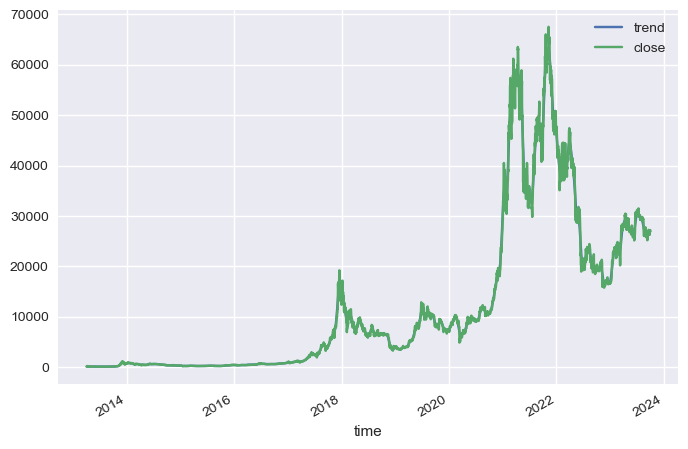

In [61]:
BTC_daily_close[['trend','close']].plot()

## Decomposition

ETS decomposition allows us to see the individual parts!

<Figure size 1500x1000 with 0 Axes>

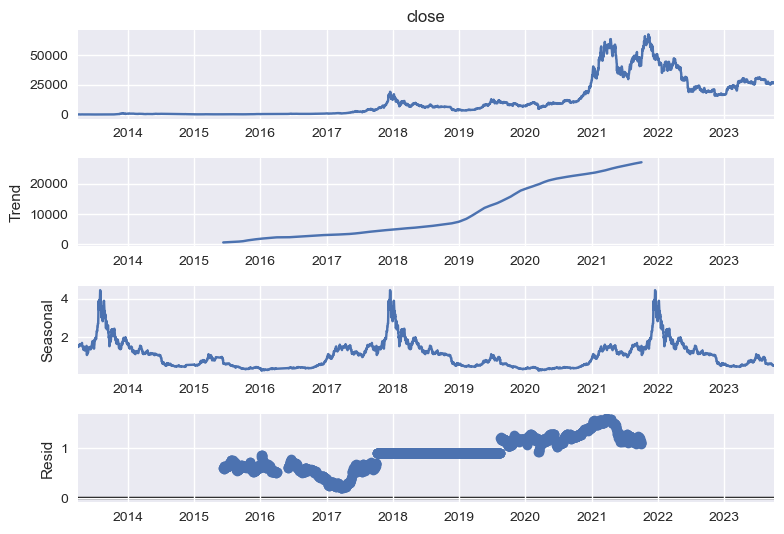

In [62]:
BTC_daily_close = BTC_daily[['close', 'Return']]

from statsmodels.tsa.seasonal import seasonal_decompose

# Specify the seasonal decomposition period
period = 365*4

decomposition = seasonal_decompose(BTC_daily_close['close'], period=period, model='multiplicative')
fig = plt.figure(figsize=(15, 10))
fig = decomposition.plot()
plt.show()

## Testing for Stationarity

We can use the Augmented [Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) `\\\\\\` [unit root test](https://en.wikipedia.org/wiki/Unit_root_test).

In [63]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(BTC_daily_close['close'])

In [64]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(round(value,2)))
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.57
p-value : 0.5
#Lags Used : 29
Number of Observations Used : 3668
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [65]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(round(value,2)))
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

### Important Note!

**We have now realized that our data is seasonal (it is also pretty obvious from the plot itself). This means we need to use Seasonal ARIMA on our model.**

___


<details><summary style="cursor: pointer;"><font color="blue" size="5"><b>Done By</b></font></summary><center><font color="red" size="6">Eng <span style="font-style: italic;">Ahmed NasrElDin</span></font></center></details>

______